# TUGAS AKHIR SAINS DATA
## Analisis dan Prediksi Cuaca di Kota Bandung Menggunakan Machine Learning

### Disusun oleh:

| No  | Nama                      | NIM          | Program Studi      |
| :-- | :------------------------ | :----------- | :----------------- |
| 1   | Herdin Kristianjani Zebua | 1227050053   | Teknik Informatika |
| 2   | Muhammad Rafli Haikal     | 1227050054   | Teknik Informatika |
| 3   | Imany Fauzy Rahman        | 1227050055   | Teknik Informatika |

**Universitas:** UIN Sunan Gunung Djati Bandung  
**Tahun:** 2025

---

### Latar Belakang
Cuaca merupakan salah satu faktor penting dalam kehidupan manusia, terutama di bidang pertanian, transportasi, dan kegiatan luar ruangan. Prediksi cuaca yang akurat dapat membantu masyarakat dan pemerintah dalam mengambil keputusan yang lebih baik.

Pada proyek ini, dilakukan analisis data cuaca historis di **Kota Bandung** untuk memahami pola perubahan suhu, curah hujan, kelembapan, dan kecepatan angin, serta membangun model **Machine Learning** untuk memprediksi kemungkinan **hujan atau tidak hujan** berdasarkan parameter cuaca tersebut.

### Tujuan
*   Melakukan **analisis eksploratif (EDA)** terhadap data cuaca Kota Bandung.
*   Membuat **model prediksi cuaca** menggunakan Machine Learning.
*   Menyajikan hasil dalam bentuk **dashboard interaktif** menggunakan Streamlit.

### Dataset
Dataset yang digunakan merupakan data cuaca harian Kota Bandung yang memuat beberapa variabel utama:

*   Tanggal
*   Suhu Minimum (°C)
*   Suhu Maksimum (°C)
*   Suhu Rata-rata (°C)
*   Kelembapan (%)
*   Kecepatan Angin Maksimum dan Rata-rata (m/s)
*   Curah Hujan (mm)
*   Arah Angin (derajat)

Dataset ini dianalisis dan dibersihkan untuk digunakan dalam proses pemodelan, termasuk **Feature Engineering** untuk menyiapkan fitur numerik dan kategorikal yang relevan:

*   Rata-rata suhu 7 hari terakhir (Suhu\_7d\_mean)
*   Jumlah curah hujan 7 hari terakhir (Hujan\_7d\_sum)
*   Bulan dan Musim (dikonversi ke label numerik jika perlu)
*   Klasifikasi curah hujan harian berdasarkan skala BMKG:
    *   Tidak Hujan: < 0.5 mm/hari
    *   Hujan Ringan: 0.5–20 mm/hari
    *   Hujan Sedang: 20–50 mm/hari
    *   Hujan Lebat: 50–100 mm/hari
    *   Hujan Sangat Lebat: >100 mm/hari

### Alur Proyek

1.  Import & Persiapan Data
2.  Pembersihan & Transformasi Data
3.  Analisis Eksploratif (EDA) lengkap, termasuk distribusi semua kolom numerik dan korelasi antar fitur
4.  Pembuatan Model Prediksi (Random Forest, Logistic Regression, dsb.)
5.  Pembuatan Dashboard Streamlit Interaktif dengan fitur input prediksi real-time
6.  Evaluasi dan Kesimpulan

### Teknologi yang Digunakan

*   Python (pandas, numpy, scikit-learn, plotly, matplotlib, seaborn)
*   Streamlit untuk visualisasi interaktif
*   Ngrok untuk publikasi dashboard di Google Colab
*   Joblib untuk menyimpan dan memuat model

### Output Akhir
*   Model prediksi hujan/tidak hujan (multi-class & biner)
*   Dashboard interaktif berbasis Streamlit dengan visualisasi:
    *   Tren suhu & curah hujan
    *   Diagram batang & lingkaran parameter cuaca
    *   Fitur input prediksi secara real-time

---

> 💡 *Notebook ini merupakan implementasi lengkap dari proses analisis data cuaca hingga pembuatan sistem prediksi berbasis machine learning dan visualisasi interaktif menggunakan Streamlit.*

## Tahap Data Understanding

Tahap ini bertujuan untuk memahami **struktur, sumber, dan karakteristik** data cuaca Bandung yang digunakan dalam analisis.

### 1. Sumber Data
Dataset diperoleh dari **Badan Meteorologi, Klimatologi, dan Geofisika (BMKG)** — Stasiun Klimatologi Bandung.  
Data diunduh dari portal resmi BMKG dalam format **Excel (.xlsx)** dengan nama file:  
`laporan_iklim_harian-251004023745.xlsx`.

### 2. Periode Data
Dataset mencakup **data iklim harian Kota Bandung** dalam rentang waktu **Januari 2019 hingga Oktober 2025**,  
dengan total sekitar **2.488 baris data** (tergantung kelengkapan setiap tahun).

### 3. Deskripsi Data
Beberapa atribut utama dalam dataset antara lain:
- **Tanggal** — waktu pencatatan data harian.  
- **Suhu Maksimum (°C)** — suhu tertinggi per hari.  
- **Suhu Minimum (°C)** — suhu terendah per hari.  
- **Suhu Rata-rata (°C)** — rata-rata suhu dalam sehari.  
- **Kelembapan (%)** — persentase kelembapan udara harian.  
- **Curah Hujan (mm)** — jumlah hujan yang turun per hari.  
- **Arah Angin** — arah dominan angin pada hari tersebut.  
- **Kecepatan Angin (m/s)** — kecepatan rata-rata angin.

### 4. Tujuan Tahap Ini
Pada tahap **Data Understanding**, dilakukan:
- Pembacaan dataset menggunakan `pandas`.  
- Pemeriksaan struktur data (`.info()` dan `.head()`).  
- Analisis awal seperti nilai kosong, tipe data, dan distribusi variabel.  
- Pemahaman konteks setiap fitur agar siap diproses pada tahap **Preprocessing** selanjutnya.

Tahap ini memastikan bahwa data BMKG Bandung sudah **relevan, lengkap, dan siap untuk diolah lebih lanjut**.


## Tahap Data Handling & Preprocessing

Pada tahap ini, data cuaca mentah diolah agar siap digunakan untuk analisis dan pemodelan Machine Learning. Langkah-langkah utama yang dilakukan meliputi:

- **Pemuatan dan Pembersihan Awal Data:**
  - Membaca file Excel (`.xlsx`).
  - Mendeteksi baris *header* secara dinamis.
  - Memuat data menggunakan *header* yang terdeteksi.
  - Membersihkan nama kolom agar lebih konsisten (menghapus karakter spesial, mengganti spasi dengan `_`).
  - Mengkonversi kolom `Tanggal` ke format datetime.
  - Menghapus baris dengan nilai tanggal yang kosong setelah konversi.
  - Mengkonversi kolom numerik ke tipe data float, menangani error dengan `coerce`.

- **Penanganan Nilai yang Hilang (Missing Values):**
  - Mengidentifikasi kolom dengan nilai kosong.
  - Mengisi nilai kosong pada kolom numerik dengan nilai rata-rata (mean).
  - Mengisi nilai kosong pada kolom kategorikal dengan nilai yang paling sering muncul (mode).

- **Penanganan Data Duplikat:**
  - Mengidentifikasi dan menghapus baris data yang merupakan duplikat.

- **Penanganan Outlier (Winsorizing):**
  - Menerapkan metode *winsorizing* pada kolom numerik yang relevan untuk membatasi nilai ekstrem (outlier) pada batas atas dan bawah *fence* (Q1 - 1.5*IQR dan Q3 + 1.5*IQR).

- **Feature Engineering:**
  - Membuat fitur baru seperti:
    - `Suhu_Rata_Calc`: Rata-rata suhu harian (dari Suhu Minimum & Maksimum).
    - `Is_Rain`: Kolom boolean yang menandakan apakah hari tersebut hujan (Curah Hujan > 0).
    - `Hari`, `Bulan`, `Tahun`: Ekstraksi informasi waktu dari kolom `Tanggal`.
    - `Suhu_7d_mean`: Rata-rata suhu dalam 7 hari terakhir (menggunakan *rolling window*).
    - `Hujan_7d_sum`: Total curah hujan dalam 7 hari terakhir (menggunakan *rolling window*).
    - `Wind_Category_Max`, `Wind_Category_Avg`: Kategorisasi kecepatan angin (Calm, Breeze, Windy, Storm).
    - `Kategori Hujan`: Kategorisasi curah hujan harian sesuai skala BMKG.
    - `Musim`: Kategorisasi bulan menjadi musim (Hujan, Kemarau, Peralihan).

- **Encoding dan Standardisasi:**
  - Melakukan **Label Encoding** pada kolom kategorikal yang digunakan sebagai fitur (`Hari`, `Bulan`, `Musim`, dll. jika digunakan dalam model) dan kolom target (`Kategori Hujan`).
  - Melakukan **Standardisasi (menggunakan StandardScaler)** pada fitur-fitur numerik untuk menormalkan skalanya.

Tahap ini menghasilkan dataset yang bersih, terstruktur, dengan fitur-fitur relevan, dan siap digunakan pada tahap analisis eksploratif (EDA) dan pemodelan Machine Learning.

In [8]:
# ====================================================
# 📘 Data Preparation + Feature Engineering (Full Code)
# ====================================================

# Import libraries
!pip install -q openpyxl scikit-learn

import pandas as pd, numpy as np, os, re
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# === Load dataset ===
file_path = "/content/laporan_iklim_harian-251004023745.xlsx"

# Check if file exists in default or mounted path
if not os.path.exists(file_path) and os.path.exists("/mnt/data/laporan_iklim_harian-251004023745.xlsx"):
    file_path = "/mnt/data/laporan_iklim_harian-251004023745.xlsx"

# Read the Excel file and identify header row
raw = pd.read_excel(file_path, header=None)
print("Raw shape:", raw.shape)
print("\nTampilkan preview transposed (baris -> kolom) supaya header mudah dilihat:")
display(raw.head(11).T)

# Try to detect header row based on presence of 'TANGGAL'
detected_header = None
for i in range(min(20, raw.shape[0])): # Check first 20 rows
    if raw.iloc[i].astype(str).str.contains('TANGGAL').any():
        detected_header = i
        break

header_row = detected_header if detected_header is not None else 0 # Fallback to 0 if not detected
print("\nDetected header row (0-based):", header_row)

# Load data with the identified header
df = pd.read_excel(file_path, header=header_row)
print("Loaded with header row =", header_row, "shape:", df.shape)
display(df.head())

# Clean column names
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[\W_]+', '_', col).strip('_') # Remove special chars, replace spaces with _, strip leading/trailing _
        new_cols.append(new_col)
    df.columns = new_cols
    return df

df = clean_col_names(df)

# Define column mapping (based on typical BMKG data)
col_map = {
    'TANGGAL': 'Tanggal',
    'TN': 'Suhu Minimum', # Suhu Minimum (°C)
    'TX': 'Suhu Maksimum', # Suhu Maksimum (°C)
    'TAVG': 'Suhu Rata-rata', # Suhu Rata-rata (°C)
    'RH_AVG': 'Kelembaban', # Kelembapan (%)
    'RR': 'Curah Hujan', # Curah Hujan (mm)
    'SS': 'SS', # Lama Penyinaran Matahari (jam) - assuming SS
    'FF_X': 'Kecepatan Angin_Max', # Kecepatan Angin Maksimum (m/s)
    'FF_AVG': 'Kecepatan Angin_Avg', # Kecepatan Angin Rata-rata (m/s)
    'DDD_X': 'Arah_Angin_deg', # Arah Angin saat Max Speed (°) - assuming DDD_X
    'DDD_CAR': 'Arah Angin' # Arah Angin Terbanyak (Code) - assuming DDD_CAR
}

# Rename columns based on mapping, keeping original if not in map
rename_dict = {k: v for k, v in col_map.items() if k in df.columns}
df = df.rename(columns=rename_dict)

# Add 'Kota/Kabupaten' column (assuming Bandung for this project)
if 'Kota_Kabupaten' not in df.columns:
    df['Kota/Kabupaten'] = 'Bandung' # Hardcode based on project description

# Convert 'Tanggal' to datetime objects, coercing errors
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

# Drop rows where Tanggal is NaN (due to coercion errors)
df.dropna(subset=['Tanggal'], inplace=True)

# Convert relevant columns to numeric, coercing errors
numeric_cols_to_convert = [
    'Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata', 'Kelembaban',
    'Curah Hujan', 'SS', 'Kecepatan Angin_Max', 'Kecepatan Angin_Avg', 'Arah_Angin_deg'
]
for col in numeric_cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found for numeric conversion.")


print("\nDtypes after conversion:")
print(df.dtypes)
display(df.head())

# === Handle Missing Values ===
# Impute missing numerical values with the mean
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Impute missing categorical values with the mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)


print("\nMissing values after imputation:")
display(df.isnull().sum().reset_index(name='missing_count').rename(columns={'index': 'column'}).sort_values('missing_count', ascending=False))
print("\nMissing value percentage after imputation:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage.reset_index(name='missing_percent').rename(columns={'index': 'column'}).sort_values('missing_percent', ascending=False))

display(df.head())

# === Handle Duplicates ===
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping = len(df)
if initial_rows > rows_after_dropping:
    print(f"\n✅ Removed {initial_rows - rows_after_dropping} duplicate rows.")
else:
    print("\n✅ No duplicate rows found.")

# === Handle Outliers (Winsorizing) ===
winsor = df.copy()
winsor_cols = ['Suhu Maksimum','Suhu Minimum','Suhu Rata-rata','Curah Hujan','Kelembaban','Kecepatan Angin_Max','Kecepatan Angin_Avg', 'Arah_Angin_deg', 'SS'] # Add relevant columns

outlier_data = []
for col in winsor_cols:
    if col in winsor.columns:
        Q1 = winsor[col].quantile(0.25)
        Q3 = winsor[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before winsorizing
        num_outliers = winsor[(winsor[col] < lower_bound) | (winsor[col] > upper_bound)].shape[0]

        # Apply winsorizing
        winsor[col] = np.where(winsor[col] < lower_bound, lower_bound, winsor[col])
        winsor[col] = np.where(winsor[col] > upper_bound, upper_bound, winsor[col])
        outlier_data.append([col, num_outliers, lower_bound, upper_bound])

    else:
         print(f"Warning: Column '{col}' not found for outlier handling.")


print("\nOutliers handled (winsorized):")
outlier_df = pd.DataFrame(outlier_data, columns=['column', 'num_outliers', 'lower_fence', 'upper_fence']).sort_values('num_outliers', ascending=False)
display(outlier_df)
display(winsor.head())

# ====================================================
# ✳️ FEATURE ENGINEERING
# ====================================================

fe = winsor.copy() # Start Feature Engineering from the winsorized data

# --- Konversi tanggal ---
fe['Tanggal'] = pd.to_datetime(fe['Tanggal']) # Already done, but good to ensure

# --- Suhu rata-rata kalkulasi ---
# Use the potentially winsorized Suhu Maksimum and Minimum
fe['Suhu_Rata_Calc'] = fe[['Suhu Maksimum', 'Suhu Minimum']].mean(axis=1)

# --- Status hujan (boolean) ---
fe['Is_Rain'] = fe['Curah Hujan'].apply(lambda x: True if x > 0 else False)

# --- Ekstrak Hari, Bulan, Tahun ---
fe['Hari'] = fe['Tanggal'].dt.day_name()
fe['Bulan'] = fe['Tanggal'].dt.month
fe['Tahun'] = fe['Tanggal'].dt.year

# --- Fitur suhu 7 hari & hujan 7 hari (rolling window) ---
# Ensure data is sorted by date for rolling window calculation
fe = fe.sort_values(by=['Kota/Kabupaten', 'Tanggal'])
fe['Suhu_7d_mean'] = fe.groupby('Kota/Kabupaten')['Suhu_Rata_Calc'].transform(lambda x: x.rolling(7, min_periods=1).mean())
fe['Hujan_7d_sum'] = fe.groupby('Kota/Kabupaten')['Curah Hujan'].transform(lambda x: x.rolling(7, min_periods=1).sum())


# --- Kategori kecepatan angin ---
def wind_category(speed):
    if pd.isna(speed): return np.nan
    if speed < 1:
        return 'Calm'
    elif speed < 5:
        return 'Breeze'
    elif speed < 10:
        return 'Windy'
    else:
        return 'Storm'

if 'Kecepatan Angin_Max' in fe.columns:
    fe['Wind_Category_Max'] = fe['Kecepatan Angin_Max'].apply(wind_category)
else:
    fe['Wind_Category_Max'] = None # Add a placeholder if column not found

if 'Kecepatan Angin_Avg' in fe.columns:
    fe['Wind_Category_Avg'] = fe['Kecepatan Angin_Avg'].apply(wind_category)
else:
    fe['Wind_Category_Avg'] = None # Add a placeholder if column not found


# --- Kategori hujan (sesuai skala BMKG) ---
def rain_category(mm):
    if pd.isna(mm): return np.nan
    if mm < 0.5:
        return 'Tidak Hujan'
    elif 0.5 <= mm <= 20:
        return 'Hujan Ringan'
    elif 20 < mm <= 50:
        return 'Hujan Sedang'
    elif 50 < mm <= 100:
        return 'Hujan Lebat'
    else: # mm > 100
        return 'Hujan Sangat Lebat'

if 'Curah Hujan' in fe.columns:
    fe['Kategori Hujan'] = fe['Curah Hujan'].apply(rain_category)
    # Convert 'Kategori Hujan' to categorical type to ensure all categories are present even if not in data
    fe['Kategori Hujan'] = pd.Categorical(fe['Kategori Hujan'], categories=['Tidak Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat', 'Hujan Sangat Lebat'], ordered=False)
else:
    fe['Kategori Hujan'] = None # Add a placeholder if column not found


# --- Musim berdasarkan bulan ---
def musim(bulan):
    if bulan in [12, 1, 2, 3, 4]: # Extended rainy season months slightly
        return 'Musim Hujan'
    elif bulan in [5, 6, 7, 8, 9, 10]: # Adjusted dry season months
        return 'Musim Kemarau'
    else: # Handle unexpected months, though unlikely with month extraction
        return 'Peralihan'

fe['Musim'] = fe['Bulan'].apply(musim)
# Convert 'Musim' to categorical type
fe['Musim'] = pd.Categorical(fe['Musim'], categories=['Musim Hujan', 'Peralihan', 'Musim Kemarau'], ordered=False)


# ====================================================
# 🔡 ENCODING untuk kolom kategorikal
# ====================================================
encoded_fe = fe.copy()
# Include only columns that actually exist in the dataframe
cat_cols_to_encode = [col for col in ['Kota/Kabupaten', 'Hari', 'Wind_Category_Max', 'Wind_Category_Avg', 'Kategori Hujan', 'Musim'] if col in encoded_fe.columns]

for col in cat_cols_to_encode:
    # Ensure all values are strings to prevent errors with LabelEncoder
    encoded_fe[col] = encoded_fe[col].astype(str)
    encoder = LabelEncoder()
    encoded_fe[col] = encoder.fit_transform(encoded_fe[col])

# Standarisasi fitur numerik
# Include only columns that actually exist and are numeric after feature engineering
num_features_to_scale = [col for col in ['Suhu Maksimum','Suhu Minimum','Suhu Rata-rata','Curah Hujan',
                                        'Kelembaban','Kecepatan Angin_Max','Kecepatan Angin_Avg', 'Arah_Angin_deg',
                                        'Suhu_Rata_Calc','Suhu_7d_mean','Hujan_7d_sum', 'SS'] if col in encoded_fe.columns and encoded_fe[col].dtype != 'object'] # Exclude object types

scaler = StandardScaler()
encoded_fe[num_features_to_scale] = scaler.fit_transform(encoded_fe[num_features_to_scale])

# ====================================================
# 💾 SIMPAN SEMUA FILE
# ====================================================
# Define file paths
mapped_fp = "/content/cuaca_bandung_mapped_raw.csv"
cleaned_fp = "/content/cuaca_bandung_mapped_cleaned.csv"
winsor_fp = "/content/cuaca_bandung_mapped_winsorized.csv"
fe_fp = "/content/cuaca_bandung_mapped_feature_engineered.csv"
encoded_fp = "/content/cuaca_bandung_mapped_encoded.csv"


# Save dataframes to CSV
try:
    df.to_csv(mapped_fp, index=False) # Save the mapped and cleaned data
    df.to_csv(cleaned_fp, index=False) # Save the mapped and cleaned data again, just in case the user meant this one
    winsor.to_csv(winsor_fp, index=False) # Save winsorized data
    fe.to_csv(fe_fp, index=False) # Save feature engineered data (before encoding)
    encoded_fe.to_csv(encoded_fp, index=False) # Save the final encoded data

    print("\n✅ Saved files:")
    print(" -", mapped_fp)
    print(" -", cleaned_fp)
    print(" -", winsor_fp)
    print(" -", fe_fp)
    print(" -", encoded_fp) # Corrected filename in print statement
except Exception as e:
    print(f"\n❌ Error saving files: {e}")


# Lihat contoh data hasil FE
print("\nPreview of the final encoded feature engineered dataset:")
display(encoded_fe.head())

Raw shape: (2488, 11)

Tampilkan preview transposed (baris -> kolom) supaya header mudah dilihat:


,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TANGGAL,01-01-2019,02-01-2019,03-01-2019
1,ID WMO,NAMA STASIUN,LINTANG,BUJUR,ELEVASI,NaN,NaN,TN,21.8,20.8,20.7
2,: 96783,: Stasiun Geofisika Bandung,: -6.88356,: 107.59733,: 791 Meter,NaN,NaN,TX,28,31,30.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAVG,23,24,24.1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RH_AVG,79,74,76
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RR,0,13.5,0.8
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SS,1.7,1.9,7.2
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF_X,3,8,7
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD_X,280,250,260
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF_AVG,2,4,4



Detected header row (0-based): 7
Loaded with header row = 7 shape: (2480, 11)


,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2019,21.8,28,23,79,0,1.7,3.0,280.0,2.0,W
1,02-01-2019,20.8,31,24,74,13.5,1.9,8.0,250.0,4.0,W
2,03-01-2019,20.7,30.6,24.1,76,0.8,7.2,7.0,260.0,4.0,W
3,04-01-2019,20,30.8,24.2,69,0,5.5,5.0,210.0,3.0,W
4,05-01-2019,20,31.7,24.8,70,0,8.5,5.0,300.0,3.0,C



Dtypes after conversion:
Tanggal                datetime64[ns]
Suhu Minimum                  float64
Suhu Maksimum                 float64
Suhu Rata-rata                float64
Kelembaban                    float64
Curah Hujan                   float64
SS                            float64
Kecepatan Angin_Max           float64
Arah_Angin_deg                float64
Kecepatan Angin_Avg           float64
Arah Angin                     object
Kota/Kabupaten                 object
dtype: object


,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,Arah Angin,Kota/Kabupaten
0,2019-01-01,21.8,28.0,23.0,79.0,0.0,1.7,3.0,280.0,2.0,W,Bandung
1,2019-02-01,20.8,31.0,24.0,74.0,13.5,1.9,8.0,250.0,4.0,W,Bandung
2,2019-03-01,20.7,30.6,24.1,76.0,0.8,7.2,7.0,260.0,4.0,W,Bandung
3,2019-04-01,20.0,30.8,24.2,69.0,0.0,5.5,5.0,210.0,3.0,W,Bandung
4,2019-05-01,20.0,31.7,24.8,70.0,0.0,8.5,5.0,300.0,3.0,C,Bandung



Missing values after imputation:


/tmp/ipython-input-597130402.py:102: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


,column,missing_count
0,Tanggal,0
1,Suhu Minimum,0
2,Suhu Maksimum,0
3,Suhu Rata-rata,0
4,Kelembaban,0
5,Curah Hujan,0
6,SS,0
7,Kecepatan Angin_Max,0
8,Arah_Angin_deg,0
9,Kecepatan Angin_Avg,0



Missing value percentage after imputation:


,column,missing_percent
0,Tanggal,0.0
1,Suhu Minimum,0.0
2,Suhu Maksimum,0.0
3,Suhu Rata-rata,0.0
4,Kelembaban,0.0
5,Curah Hujan,0.0
6,SS,0.0
7,Kecepatan Angin_Max,0.0
8,Arah_Angin_deg,0.0
9,Kecepatan Angin_Avg,0.0


,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,Arah Angin,Kota/Kabupaten
0,2019-01-01,21.8,28.0,23.0,79.0,0.0,1.7,3.0,280.0,2.0,W,Bandung
1,2019-02-01,20.8,31.0,24.0,74.0,13.5,1.9,8.0,250.0,4.0,W,Bandung
2,2019-03-01,20.7,30.6,24.1,76.0,0.8,7.2,7.0,260.0,4.0,W,Bandung
3,2019-04-01,20.0,30.8,24.2,69.0,0.0,5.5,5.0,210.0,3.0,W,Bandung
4,2019-05-01,20.0,31.7,24.8,70.0,0.0,8.5,5.0,300.0,3.0,C,Bandung



✅ Removed 2 duplicate rows.

Outliers handled (winsorized):


,column,num_outliers,lower_fence,upper_fence
3,Curah Hujan,175,-36.2625,60.4375
1,Suhu Minimum,37,18.0000,22.8000
2,Suhu Rata-rata,34,21.6000,26.4000
0,Suhu Maksimum,21,26.3000,33.5000
4,Kelembaban,17,58.0000,98.0000
6,Kecepatan Angin_Avg,13,-0.5000,3.5000
5,Kecepatan Angin_Max,2,0.0000,8.0000
7,Arah_Angin_deg,0,-105.0000,495.0000
8,SS,0,-1.7500,12.2500


,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,Arah Angin,Kota/Kabupaten
0,2019-01-01,21.8,28.0,23.0,79.0,0.0,1.7,3.0,280.0,2.0,W,Bandung
1,2019-02-01,20.8,31.0,24.0,74.0,13.5,1.9,8.0,250.0,3.5,W,Bandung
2,2019-03-01,20.7,30.6,24.1,76.0,0.8,7.2,7.0,260.0,3.5,W,Bandung
3,2019-04-01,20.0,30.8,24.2,69.0,0.0,5.5,5.0,210.0,3.0,W,Bandung
4,2019-05-01,20.0,31.7,24.8,70.0,0.0,8.5,5.0,300.0,3.0,C,Bandung



✅ Saved files:
 - /content/cuaca_bandung_mapped_raw.csv
 - /content/cuaca_bandung_mapped_cleaned.csv
 - /content/cuaca_bandung_mapped_winsorized.csv
 - /content/cuaca_bandung_mapped_feature_engineered.csv
 - /content/cuaca_bandung_mapped_encoded.csv

Preview of the final encoded feature engineered dataset:


,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,...,Is_Rain,Hari,Bulan,Tahun,Suhu_7d_mean,Hujan_7d_sum,Wind_Category_Max,Wind_Category_Avg,Kategori Hujan,Musim
0,2019-01-01,1.383872,-1.319385,-1.032998,0.205938,-0.717993,-1.419156,-0.498211,0.913266,0.880411,...,False,5,1,2019,-0.522351,-1.816526,0,0,3,0
31,2019-01-02,-0.035414,0.768645,-0.135752,0.068525,-0.674015,-0.033424,0.973707,0.796822,0.880411,...,True,6,1,2019,0.377466,-1.800596,2,0,1,0
59,2019-01-03,0.437681,-1.180183,-1.032998,1.580074,-0.700402,0.218527,-0.498211,1.029709,-0.253796,...,True,4,1,2019,-0.242408,-1.794224,0,0,3,0
90,2019-01-04,-0.319271,0.490241,-0.933304,0.893006,-0.678412,-0.999237,-0.498211,0.913266,-0.253796,...,True,0,1,2019,-0.072442,-1.779887,0,0,1,0
120,2019-01-05,1.573110,-0.344971,1.060575,0.480765,-0.449724,-0.327367,0.973707,0.563936,0.880411,...,True,2,1,2019,0.221498,-1.682714,2,0,1,0


## Tahap Exploratory Data Analysis (EDA)

Tahap ini bertujuan untuk memahami pola dan karakteristik data sebelum dilakukan pemodelan.
Beberapa analisis yang dilakukan antara lain:

- **Analisis Distribusi Data:** Melihat sebaran nilai seperti suhu, curah hujan, dan kelembapan menggunakan histogram dan KDE plots.
- **Korelasi Antar Variabel:** Mengidentifikasi hubungan linear antar parameter cuaca menggunakan heatmap korelasi.
- **Visualisasi Data:** Menggunakan berbagai grafik untuk menemukan tren dan pola musiman:
  - Tren suhu rata-rata harian (plot garis).
  - Tren curah hujan harian (plot batang).
  - Hubungan suhu rata-rata dan kelembaban terhadap kejadian hujan (scatterplot).
  - Rata-rata curah hujan per bulan (barplot).
  - Perbandingan suhu rata-rata per musim (boxplot).
  - Hubungan suhu rata-rata vs curah hujan (scatterplot).
  - Hubungan intensitas hujan dengan kecepatan angin rata-rata (boxplot).

Hasil dari tahap ini memberikan gambaran awal tentang faktor-faktor yang berpengaruh terhadap kondisi cuaca di Bandung dan membantu dalam pemilihan fitur untuk model.

✅ Dataset berhasil dimuat dari: /content/cuaca_bandung_mapped_feature_engineered.csv

📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tanggal              972 non-null    object 
 1   Suhu Minimum         972 non-null    float64
 2   Suhu Maksimum        972 non-null    float64
 3   Suhu Rata-rata       972 non-null    float64
 4   Kelembaban           972 non-null    float64
 5   Curah Hujan          972 non-null    float64
 6   SS                   972 non-null    float64
 7   Kecepatan Angin_Max  972 non-null    float64
 8   Arah_Angin_deg       972 non-null    float64
 9   Kecepatan Angin_Avg  972 non-null    float64
 10  Arah Angin           972 non-null    object 
 11  Kota/Kabupaten       972 non-null    object 
 12  Suhu_Rata_Calc       972 non-null    float64
 13  Is_Rain              972 non-null    b

,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,...,Is_Rain,Hari,Bulan,Tahun,Suhu_7d_mean,Hujan_7d_sum,Wind_Category_Max,Wind_Category_Avg,Kategori Hujan,Musim
count,972,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,...,972,972,972.000000,972.000000,972.000000,972.000000,972,972,972,972
unique,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,7,NaN,NaN,NaN,NaN,3,2,4,3
top,2025-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,Tuesday,NaN,NaN,NaN,NaN,Breeze,Breeze,Hujan Ringan,Musim Kemarau
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,694,140,NaN,NaN,NaN,NaN,703,766,383,485
mean,NaN,20.337428,29.895641,24.036169,77.501325,16.325990,5.079597,3.676955,201.569959,1.223765,...,NaN,NaN,6.491770,2021.893004,25.117690,114.032034,NaN,NaN,NaN,NaN
std,NaN,1.057414,1.437501,1.003586,7.281048,22.750073,2.382639,1.359471,85.922895,0.882127,...,NaN,NaN,3.460374,1.955444,0.416966,62.807109,NaN,NaN,NaN,NaN
min,NaN,18.000000,26.300000,21.600000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,1.000000,2019.000000,23.900000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,19.800000,29.000000,23.400000,73.000000,0.000000,3.500000,3.000000,120.000000,1.000000,...,NaN,NaN,3.000000,2020.000000,24.842857,68.759375,NaN,NaN,NaN,NaN
50%,NaN,20.400000,30.000000,24.000000,78.000000,3.750000,5.200000,3.000000,240.000000,1.000000,...,NaN,NaN,6.000000,2022.000000,25.114286,108.737500,NaN,NaN,NaN,NaN
75%,NaN,21.000000,30.800000,24.600000,83.000000,24.175000,7.000000,5.000000,270.000000,2.000000,...,NaN,NaN,9.250000,2024.000000,25.421429,160.625000,NaN,NaN,NaN,NaN



📋 Preview Data:


,Tanggal,Suhu Minimum,Suhu Maksimum,Suhu Rata-rata,Kelembaban,Curah Hujan,SS,Kecepatan Angin_Max,Arah_Angin_deg,Kecepatan Angin_Avg,...,Is_Rain,Hari,Bulan,Tahun,Suhu_7d_mean,Hujan_7d_sum,Wind_Category_Max,Wind_Category_Avg,Kategori Hujan,Musim
0,2019-01-01,21.8,28.0,23.0,79.0,0.0,1.7,3.0,280.0,2.0,...,False,Tuesday,1,2019,24.900000,0.0,Breeze,Breeze,Tidak Hujan,Musim Hujan
1,2019-01-02,20.3,31.0,23.9,78.0,1.0,5.0,5.0,270.0,2.0,...,True,Wednesday,1,2019,25.275000,1.0,Windy,Breeze,Hujan Ringan,Musim Hujan
2,2019-01-03,20.8,28.2,23.0,89.0,0.4,5.6,3.0,290.0,1.0,...,True,Thursday,1,2019,25.016667,1.4,Breeze,Breeze,Tidak Hujan,Musim Hujan
3,2019-01-04,20.0,30.6,23.1,84.0,0.9,2.7,3.0,280.0,1.0,...,True,Friday,1,2019,25.087500,2.3,Breeze,Breeze,Hujan Ringan,Musim Hujan
4,2019-01-05,22.0,29.4,25.1,81.0,6.1,4.3,5.0,250.0,2.0,...,True,Saturday,1,2019,25.210000,8.4,Windy,Breeze,Hujan Ringan,Musim Hujan



📈 Analisis Distribusi Data:


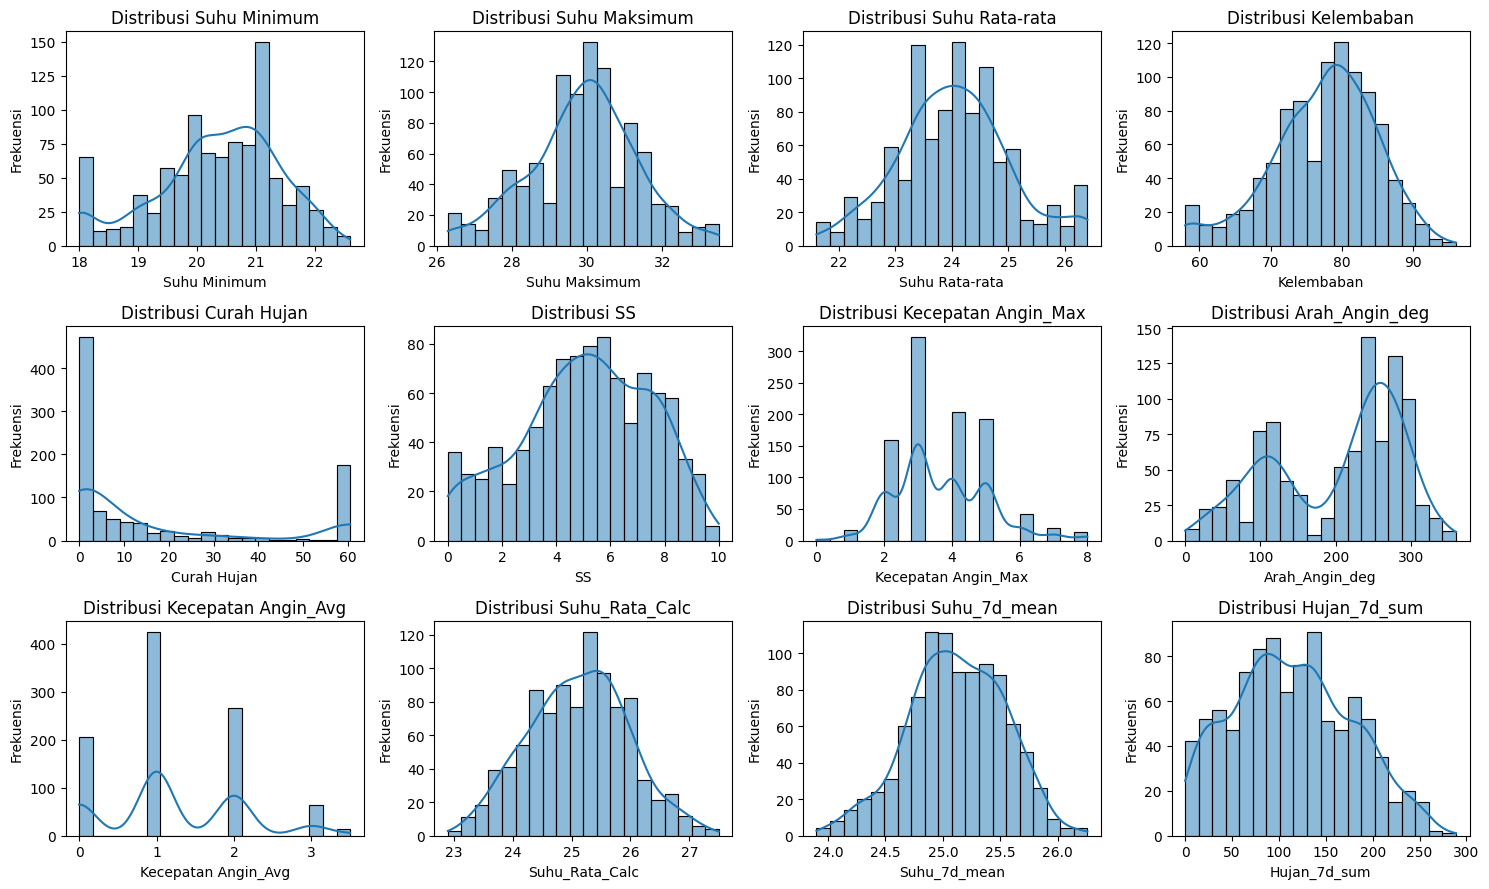


📉 Korelasi Antar Variabel:


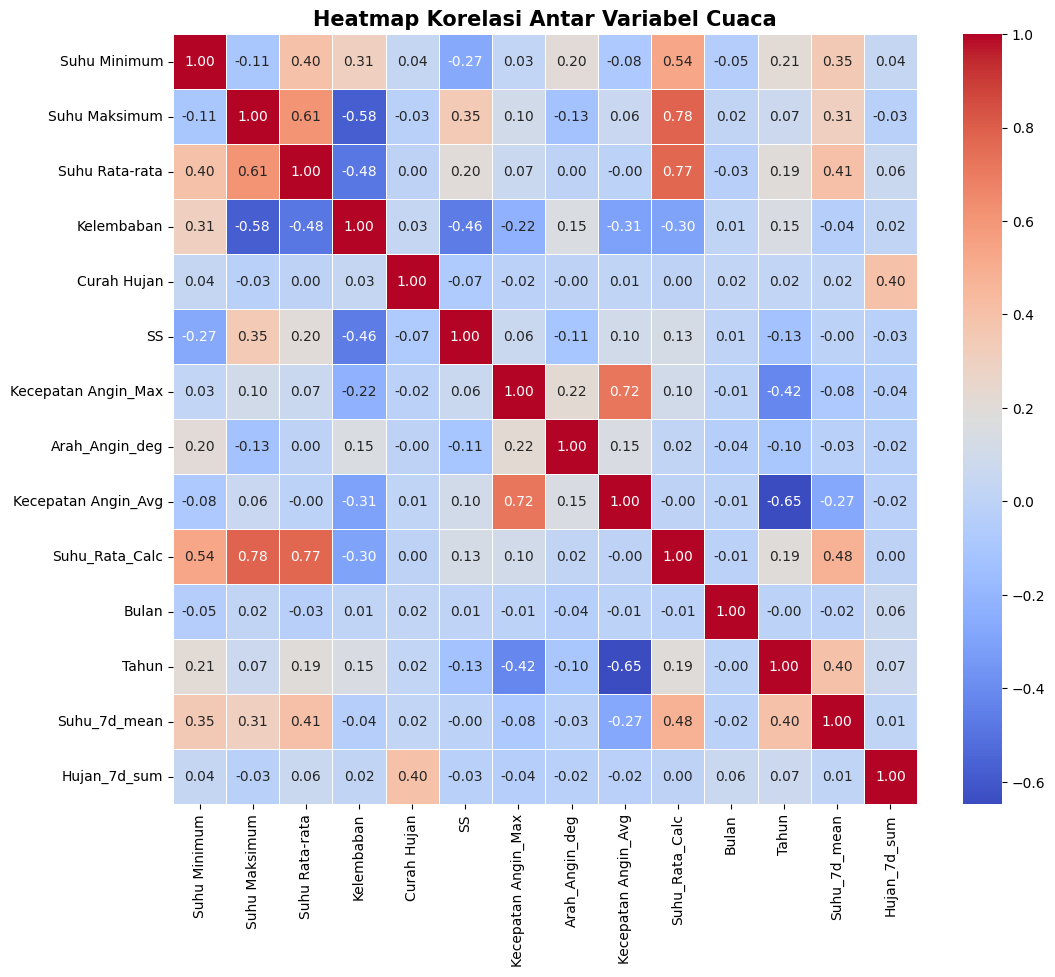


💡 Visualisasi Insight:


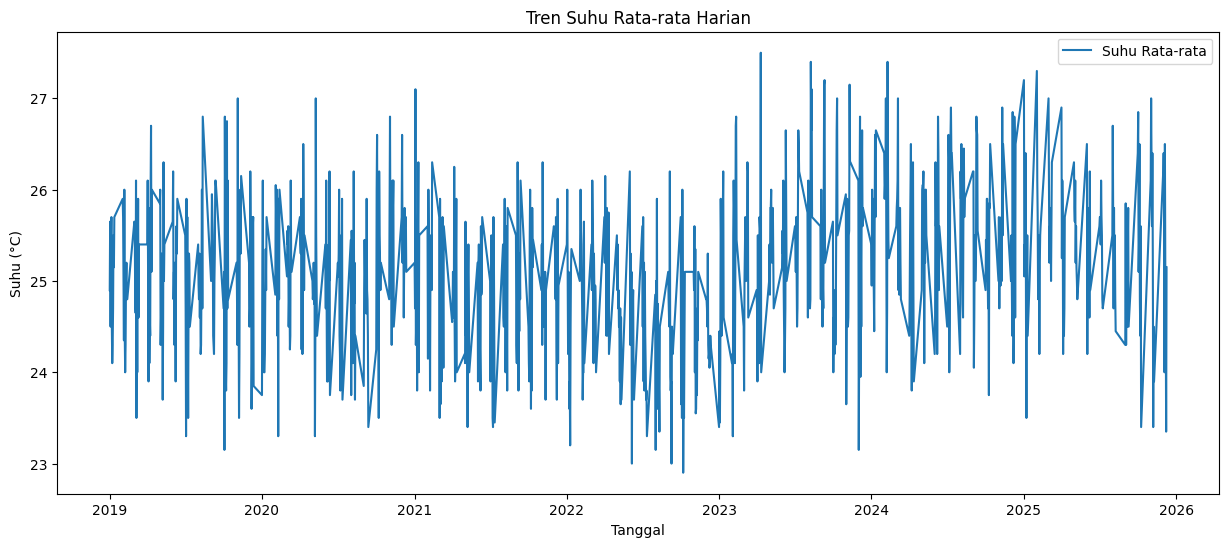

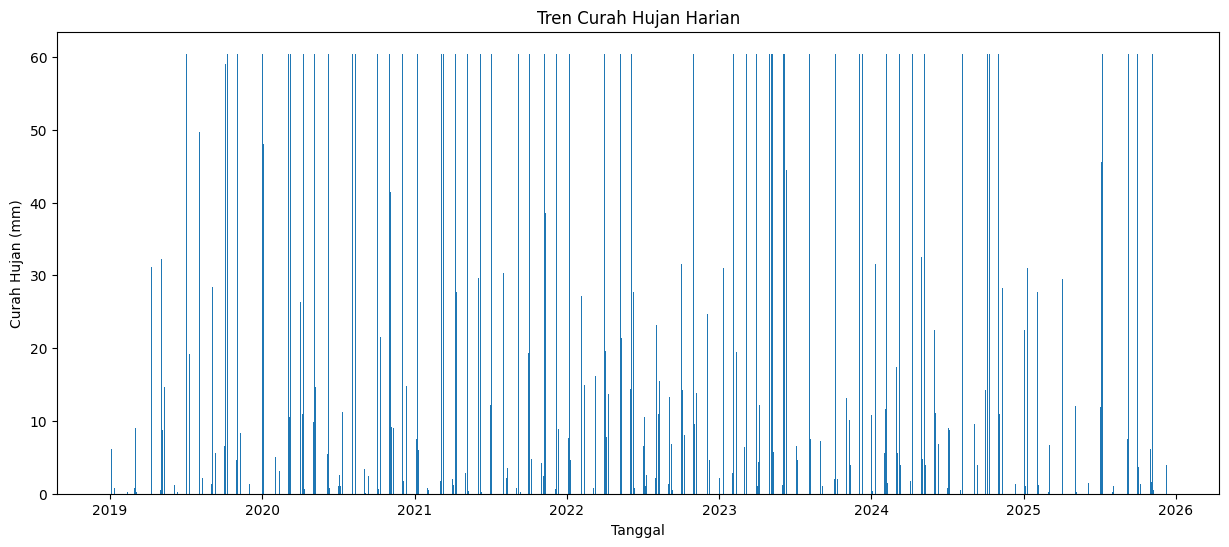

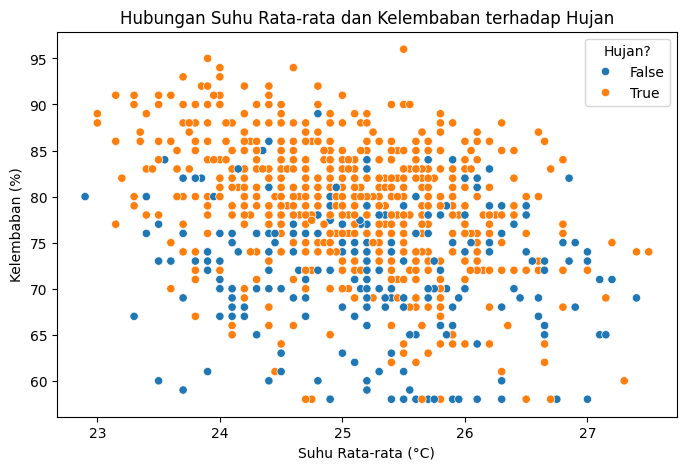

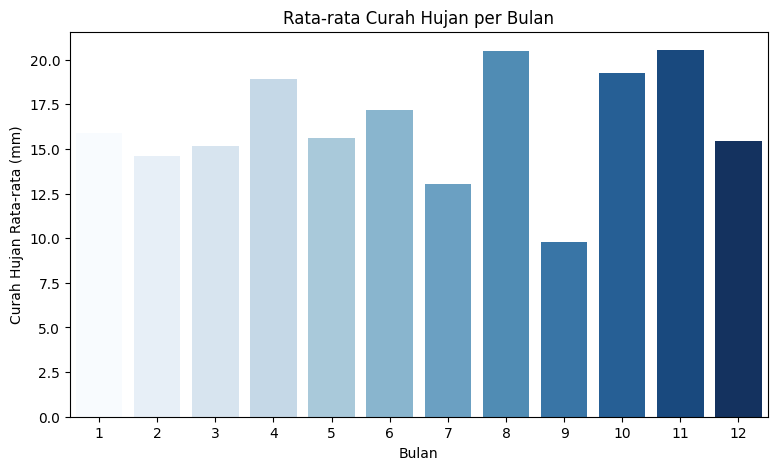

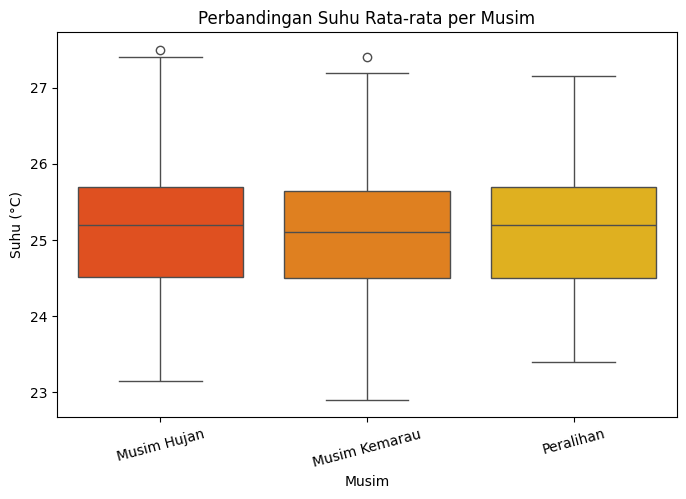

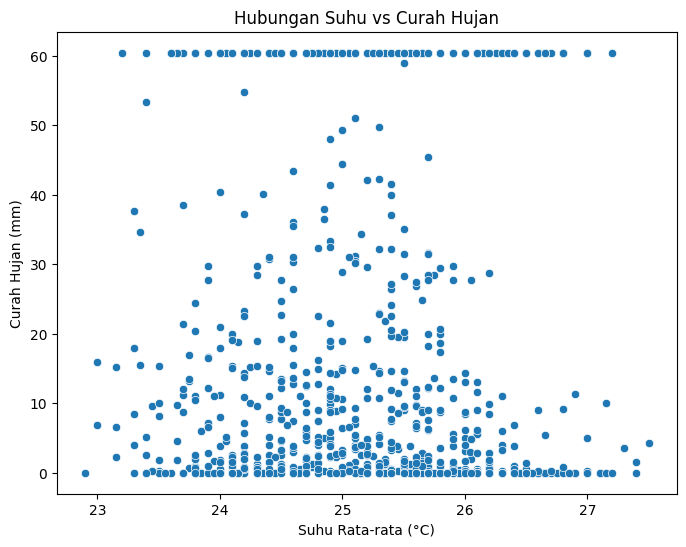

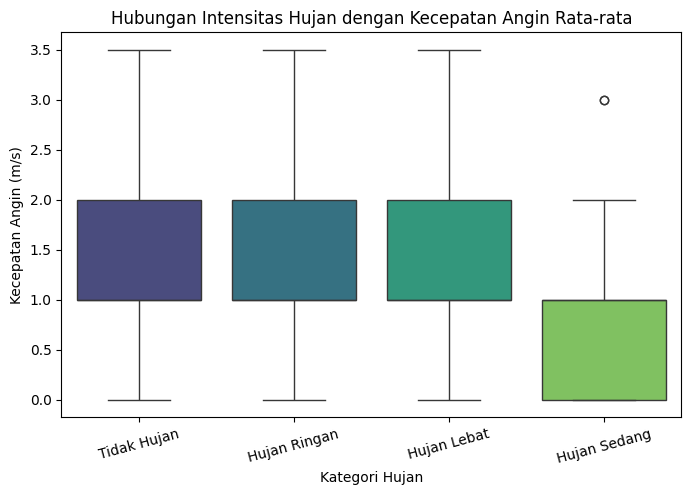


✅ Analisis EDA selesai. Grafik distribusi, korelasi, dan insight sudah ditampilkan.


In [19]:
# ====================================================
# 📊 EXPLORATORY DATA ANALYSIS (EDA) - CUACA BANDUNG
# ====================================================

# 1️⃣ Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for numerical column selection

# === Load dataset ===
file_path = "/content/cuaca_bandung_mapped_feature_engineered.csv"
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat dari:", file_path)
except FileNotFoundError:
    print(f"❌ Error: File '{file_path}' tidak ditemukan.")
    # Exit or handle the error appropriately if the file is crucial
    exit() # Stop execution if dataset is not found

# === Info dasar dataset ===
print("\n📌 Info Dataset:")
df.info() # Use df.info() directly for cleaner output

print("\n📊 Statistik Deskriptif:")
display(df.describe(include='all')) # Use display() for better formatting

# === Preview beberapa data ===
print("\n📋 Preview Data:")
display(df.head())

# ====================================================
# 2️⃣ ANALISIS DISTRIBUSI DATA
# ====================================================

print("\n📈 Analisis Distribusi Data:")
# Get all numerical columns, excluding 'Bulan' and 'Tahun' if they are treated separately later
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Optionally exclude columns that are not meaningful for distribution plots, like encoded categorical
# example: if 'Musim' was encoded to numeric and included in numeric_cols, you might exclude it here
# numeric_cols_for_dist = [col for col in numeric_cols if col not in ['Bulan', 'Tahun', 'Musim_encoded_column_name']]
numeric_cols_for_dist = [col for col in numeric_cols if col not in ['Bulan', 'Tahun']] # Exclude Month and Year for now

n_cols = 4 # Number of columns in the subplot grid
n_rows = (len(numeric_cols_for_dist) + n_cols - 1) // n_cols # Calculate number of rows needed

if numeric_cols_for_dist: # Only plot if there are columns to plot
    plt.figure(figsize=(15, n_rows * 3)) # Adjust figure size based on number of rows
    for i, col in enumerate(numeric_cols_for_dist, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Tidak ada kolom numerik yang dipilih untuk analisis distribusi.")


# ====================================================
# 3️⃣ KORELASI ANTAR VARIABEL
# ====================================================

print("\n📉 Korelasi Antar Variabel:")
# Pilih fitur numerik untuk analisis korelasi
# Use the same numeric_cols list (including Bulan, Tahun if relevant for correlation)
corr_cols = numeric_cols

if corr_cols: # Only plot heatmap if there are columns
    plt.figure(figsize=(12,10)) # Adjusted figure size for better readability
    sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Heatmap Korelasi Antar Variabel Cuaca", fontsize=15, weight='bold')
    plt.show()
else:
    print("⚠️ Tidak ada kolom numerik yang dipilih untuk analisis korelasi.")


# ====================================================
# 4️⃣ VISUALISASI INSIGHT
# ====================================================

print("\n💡 Visualisasi Insight:")

# Ensure 'Tanggal' is datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# --- Menganalisis tren waktu (time series) ---
if 'Suhu_Rata_Calc' in df.columns:
    plt.figure(figsize=(15,6))
    plt.plot(df['Tanggal'], df['Suhu_Rata_Calc'], label='Suhu Rata-rata')
    plt.ylabel('Suhu (°C)')
    plt.xlabel('Tanggal')
    plt.title('Tren Suhu Rata-rata Harian')
    plt.legend()
    plt.show()
else:
    print("⚠️ Kolom 'Suhu_Rata_Calc' tidak ditemukan untuk plot tren suhu.")

if 'Curah Hujan' in df.columns:
    plt.figure(figsize=(15,6))
    plt.bar(df['Tanggal'], df['Curah Hujan'])
    plt.ylabel('Curah Hujan (mm)')
    plt.xlabel('Tanggal')
    plt.title('Tren Curah Hujan Harian')
    plt.show()
else:
    print("⚠️ Kolom 'Curah Hujan' tidak ditemukan untuk plot tren curah hujan.")


# --- Hubungan suhu rata-rata & kelembaban terhadap Hujan ---
if 'Suhu_Rata_Calc' in df.columns and 'Kelembaban' in df.columns and 'Is_Rain' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Suhu_Rata_Calc', y='Kelembaban', data=df, hue='Is_Rain')
    plt.title("Hubungan Suhu Rata-rata dan Kelembaban terhadap Hujan")
    plt.xlabel("Suhu Rata-rata (°C)")
    plt.ylabel("Kelembaban (%)")
    plt.legend(title="Hujan?")
    plt.show()
else:
     print("⚠️ Kolom yang diperlukan untuk plot scatter Suhu vs Kelembaban tidak lengkap.")


# --- Rata-rata curah hujan per bulan ---
if 'Bulan' in df.columns and 'Curah Hujan' in df.columns:
    plt.figure(figsize=(9,5))
    # Use hue instead of palette without hue for clarity in future seaborn versions
    sns.barplot(x='Bulan', y='Curah Hujan', data=df, estimator='mean', errorbar=None, hue='Bulan', palette='Blues', legend=False)
    plt.title("Rata-rata Curah Hujan per Bulan")
    plt.xlabel("Bulan")
    plt.ylabel("Curah Hujan Rata-rata (mm)")
    plt.show()
else:
    print("⚠️ Kolom 'Bulan' atau 'Curah Hujan' tidak ditemukan untuk plot curah hujan per bulan.")


# --- Rata-rata suhu per musim ---
if 'Musim' in df.columns and 'Suhu_Rata_Calc' in df.columns:
    plt.figure(figsize=(8,5))
    # Use hue instead of palette without hue for clarity in future seaborn versions
    sns.boxplot(x='Musim', y='Suhu_Rata_Calc', data=df, hue='Musim', palette='autumn', legend=False)
    plt.title("Perbandingan Suhu Rata-rata per Musim")
    plt.xlabel("Musim")
    plt.ylabel("Suhu (°C)")
    plt.xticks(rotation=15)
    plt.show()
else:
    print("⚠️ Kolom 'Musim' atau 'Suhu_Rata_Calc' tidak ditemukan untuk plot suhu per musim.")


# --- Hubungan Suhu vs Curah Hujan ---
if 'Suhu_Rata_Calc' in df.columns and 'Curah Hujan' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Suhu_Rata_Calc', y='Curah Hujan', data=df)
    plt.title('Hubungan Suhu vs Curah Hujan')
    plt.xlabel('Suhu Rata-rata (°C)')
    plt.ylabel('Curah Hujan (mm)')
    plt.show()
else:
    print("⚠️ Kolom 'Suhu_Rata_Calc' atau 'Curah Hujan' tidak ditemukan untuk plot scatter.")


# --- Kategori hujan vs kecepatan angin rata-rata ---
if 'Kategori Hujan' in df.columns and 'Kecepatan Angin_Avg' in df.columns:
    plt.figure(figsize=(8,5))
    # Use hue instead of palette without hue for clarity in future seaborn versions
    sns.boxplot(x='Kategori Hujan', y='Kecepatan Angin_Avg', data=df, hue='Kategori Hujan', palette='viridis', legend=False)
    plt.title("Hubungan Intensitas Hujan dengan Kecepatan Angin Rata-rata")
    plt.xlabel("Kategori Hujan")
    plt.ylabel("Kecepatan Angin (m/s)")
    plt.xticks(rotation=15)
    plt.show()
else:
    print("⚠️ Kolom 'Kategori Hujan' atau 'Kecepatan Angin_Avg' tidak ditemukan untuk plot boxplot.")

print("\n✅ Analisis EDA selesai. Grafik distribusi, korelasi, dan insight sudah ditampilkan.")

## Pemodelan dan Evaluasi Model

Pada tahap ini, model Machine Learning dilatih dan dievaluasi untuk memprediksi kategori cuaca. Algoritma **Random Forest Classifier** digunakan.

**Proses yang dilakukan:**

- **Pemilihan Fitur dan Target:** Menentukan kolom yang akan digunakan sebagai fitur (input model) dan kolom yang akan diprediksi (target).
- **Encoding Kolom Kategorikal:** Mengubah nilai kategori (seperti 'Musim') menjadi representasi numerik menggunakan Label Encoding agar dapat diproses oleh model.
- **Encoding Target:** Mengubah kategori hujan ('Tidak Hujan', 'Hujan Ringan', dll.) menjadi nilai numerik menggunakan Label Encoding.
- **Split Data:** Membagi dataset menjadi data pelatihan (training) dan data pengujian (testing) untuk melatih dan mengevaluasi model secara objektif. Stratified split digunakan untuk menjaga proporsi kelas target.
- **Standarisasi Fitur Numerik:** Menormalkan skala fitur numerik menggunakan StandardScaler agar tidak ada fitur yang mendominasi karena rentang nilainya yang besar.
- **Training Model:** Melatih model Random Forest Classifier menggunakan data pelatihan yang sudah diproses. `class_weight='balanced'` digunakan untuk menangani potensi ketidakseimbangan jumlah data antar kategori hujan.
- **Prediksi:** Menggunakan model yang sudah dilatih untuk memprediksi kategori cuaca pada data pengujian.
- **Evaluasi Model:** Menilai performa model menggunakan metrik:
  - Accuracy: Persentase prediksi yang benar secara keseluruhan.
  - Classification Report: Detail performa untuk setiap kategori, meliputi Precision (seberapa akurat prediksi positif), Recall (seberapa baik model menemukan semua positif), dan F1-score (rata-rata harmonis Precision dan Recall).
  - Confusion Matrix: Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kategori, membantu memahami jenis kesalahan yang dibuat model.
- **Visualisasi Feature Importance:** Menampilkan fitur-fitur yang paling berkontribusi pada keputusan prediksi model Random Forest.
- **Penyimpanan Artefak:** Menyimpan model yang sudah dilatih, scaler, dan encoder ke dalam file (`.pkl`) agar dapat digunakan kembali tanpa melatih ulang.

Tahap ini penting untuk memastikan model siap digunakan dalam prediksi cuaca secara akurat.

✅ Dataset berhasil dimuat dari: cuaca_bandung_mapped_feature_engineered.csv
📂 Jumlah data: 972
📋 Kolom: ['Tanggal', 'Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata', 'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max', 'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Arah Angin', 'Kota/Kabupaten', 'Suhu_Rata_Calc', 'Is_Rain', 'Hari', 'Bulan', 'Tahun', 'Suhu_7d_mean', 'Hujan_7d_sum', 'Wind_Category_Max', 'Wind_Category_Avg', 'Kategori Hujan', 'Musim']

Total fitur digunakan: 14
Fitur yang digunakan:
 ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max', 'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Suhu_Rata_Calc', 'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim']

✅ Kolom 'Musim' berhasil di-encode.
✅ Kolom target 'Kategori Hujan' berhasil di-encode.
Mapping encoded labels: {'Hujan Lebat': np.int64(0), 'Hujan Ringan': np.int64(1), 'Hujan Sedang': np.int64(2), 'Tidak Hujan': np.int64(3)}

✅ Data berhasil di-split menjadi train dan test 

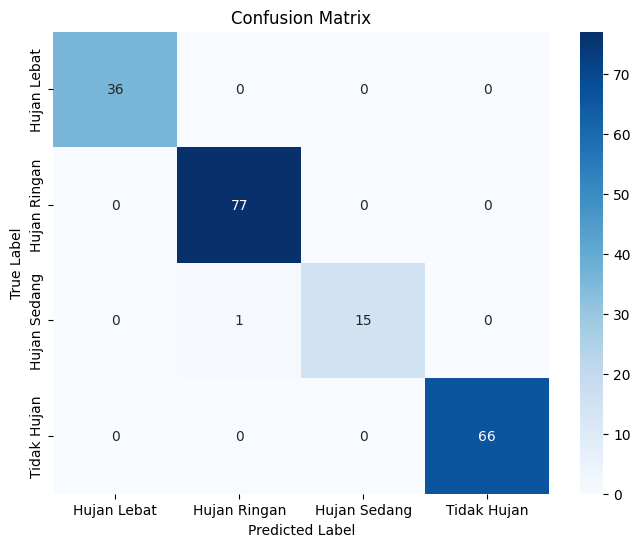

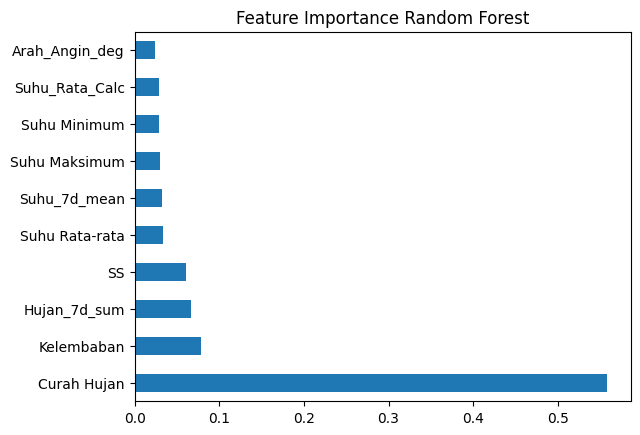


✅ Model, Scaler, dan Encoder berhasil disimpan!


In [20]:
# ====================================================
# 🌲 PEMODELAN & EVALUASI MODEL (RANDOM FOREST)
# ====================================================

# === 1. Import Library ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for heatmap

# === 2. Load Dataset Feature Engineered ===
# Memuat dataset yang sudah melalui tahap feature engineering
try:
    df = pd.read_csv("cuaca_bandung_mapped_feature_engineered.csv")
    print("✅ Dataset berhasil dimuat dari:", "cuaca_bandung_mapped_feature_engineered.csv")
    print("📂 Jumlah data:", len(df))
except FileNotFoundError:
    print("❌ Error: File 'cuaca_bandung_mapped_feature_engineered.csv' tidak ditemukan.")
    # Berhenti jika file tidak ditemukan
    exit()


# Pastikan kolom target dan fitur lengkap
print("📋 Kolom:", df.columns.tolist())


# === 3. Pilih fitur dan target ===
# Menentukan kolom fitur (X) dan kolom target (y)
# Pastikan daftar kolom ini sesuai dengan fitur yang ingin Anda gunakan
feature_columns = [
    'Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata',
    'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max',
    'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Suhu_Rata_Calc',
    'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim' # Menambahkan 'Bulan' dan 'Musim' jika digunakan
]
target_column = 'Kategori Hujan' # Menggunakan Kategori Hujan sebagai target

# Filter feature_columns untuk hanya menyertakan kolom yang ada di dataframe
feature_columns_existing = [col for col in feature_columns if col in df.columns]
# Jika ada kolom yang hilang, beri peringatan
missing_cols = [col for col in feature_columns if col not in df.columns]
if missing_cols:
    print(f"⚠️ Warning: Kolom fitur berikut tidak ditemukan di dataset dan akan diabaikan: {missing_cols}")

X = df[feature_columns_existing].copy()
y = df[target_column].copy()

print(f"\nTotal fitur digunakan: {len(X.columns)}")
print("Fitur yang digunakan:\n", X.columns.tolist())


# === 4. Label encoding untuk kolom kategori di fitur (jika ada) ===
# Menggunakan LabelEncoder untuk kolom 'Musim'
# Pastikan 'Musim' ada di feature_columns_existing
if 'Musim' in X.columns:
    le_musim = LabelEncoder()
    X['Musim'] = le_musim.fit_transform(X['Musim'])
    print("\n✅ Kolom 'Musim' berhasil di-encode.")
else:
    print("\n⚠️ Kolom 'Musim' tidak ditemukan di fitur.")


# === 5. Encode target kategori hujan ===
# Menggunakan LabelEncoder untuk kolom target 'Kategori Hujan'
le_label = LabelEncoder()
y_encoded = le_label.fit_transform(y)
print("✅ Kolom target 'Kategori Hujan' berhasil di-encode.")
print("Mapping encoded labels:", dict(zip(le_label.classes_, le_label.transform(le_label.classes_))))


# === 6. Split data untuk training dan testing ===
# Membagi data menjadi set pelatihan (training) dan set pengujian (testing)
# Stratify digunakan untuk memastikan distribusi kelas target yang sama di train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("\n✅ Data berhasil di-split menjadi train dan test set.")
print("Ukuran data latih :", X_train.shape)
print("Ukuran data uji   :", X_test.shape)


# === 7. Standarisasi fitur numerik ===
# Menggunakan StandardScaler untuk menstandarisasi fitur numerik
# Hanya fit pada data training untuk menghindari data leakage
numeric_cols_train = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols_train])
X_test_scaled = scaler.transform(X_test[numeric_cols_train])

# Mengganti kolom numerik di X_train dan X_test dengan yang sudah diskalakan
X_train[numeric_cols_train] = X_train_scaled
X_test[numeric_cols_train] = X_test_scaled

print("\n✅ Data fitur berhasil distandardisasi.")


# === 8. Train model Random Forest dengan class_weight balanced ===
# Menginisialisasi dan melatih model Random Forest Classifier
# class_weight='balanced' membantu menangani dataset yang tidak seimbang
print("\n🌲=== Model: Random Forest Classifier ===")
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced' # Penting untuk data tidak seimbang
)
model.fit(X_train, y_train) # Latih model dengan data yang sudah diskalakan

print("\n✅ Model Random Forest berhasil dilatih.")


# === 9. Evaluasi model ===
# Melakukan prediksi pada data pengujian dan mengevaluasi performa model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model pada data uji: {acc*100:.2f}%")

print("\n📋 Classification Report:")
# Menggunakan target_names dari LabelEncoder untuk laporan yang lebih mudah dibaca
print(classification_report(y_test, y_pred, target_names=le_label.classes_))

# Menampilkan Confusion Matrix (opsional, tapi sangat informatif)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_label.classes_, yticklabels=le_label.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# === 10. Visualisasi Feature Importance ===
# Menampilkan 10 fitur terpenting menurut model Random Forest
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Random Forest")
plt.show()


# === 11. Simpan model dan scaler ===
# Menyimpan model yang sudah dilatih, scaler, dan label encoder untuk digunakan di aplikasi Streamlit
joblib.dump(model, "model_rf_kategori_balanced.pkl")
joblib.dump(scaler, "scaler_rf_kategori_balanced.pkl") # Simpan scaler yang fit pada data training
joblib.dump(le_label, "label_encoder_balanced.pkl") # Simpan label encoder untuk target
if 'Musim' in X.columns:
     joblib.dump(le_musim, "musim_encoder.pkl") # Simpan encoder untuk 'Musim' jika digunakan

print("\n✅ Model, Scaler, dan Encoder berhasil disimpan!")

## Contoh Penggunaan Model untuk Prediksi Baru

Kode ini mendemonstrasikan bagaimana menggunakan model Random Forest yang sudah dilatih, scaler, dan encoder untuk membuat prediksi cuaca baru berdasarkan data input.

**Langkah-langkah yang dilakukan:**

1.  **Import Library:** Mengimpor library yang diperlukan (`joblib` untuk memuat model/scaler/encoder, `pandas` untuk manipulasi data, `numpy` untuk operasi numerik).
2.  **Load Artefak:** Memuat model (`model_rf_kategori_balanced.pkl`), scaler (`scaler_rf_kategori_balanced.pkl`), label encoder untuk target (`label_encoder_balanced.pkl`), dan encoder untuk kolom 'Musim' (`musim_encoder.pkl`) yang sebelumnya telah disimpan. Ini memungkinkan penggunaan model tanpa perlu melatih ulang.
3.  **Siapkan Data Input Baru:** Mendefinisikan data cuaca baru yang ingin diprediksi. Data ini disiapkan dalam format list of lists dan kemudian dikonversi menjadi Pandas DataFrame dengan nama kolom yang sesuai dengan fitur yang digunakan saat training model.
4.  **Preprocessing Data Input:**
    *   Mengkonversi kolom 'Musim' pada data input menggunakan `le_musim` encoder (jika encoder berhasil dimuat).
    *   Mengidentifikasi kolom numerik dalam data input.
    *   Melakukan standarisasi pada kolom numerik menggunakan `scaler` yang sudah dimuat. Ini penting agar skala data input konsisten dengan data yang digunakan saat model dilatih.
5.  **Prediksi:** Menggunakan model yang sudah dimuat (`model.predict()`) untuk membuat prediksi kategori cuaca (dalam bentuk numerik) dan probabilitas untuk setiap kategori (`model.predict_proba()`) berdasarkan data input yang sudah diproses.
6.  **Interpretasi Hasil Prediksi:**
    *   Mengkonversi hasil prediksi numerik kembali ke label kategori hujan string menggunakan `le_label` encoder (`le_label.inverse_transform()`).
    *   Mengambil probabilitas untuk setiap kategori hujan dari hasil `predict_proba`.
    *   Menjumlahkan probabilitas kategori hujan (Ringan, Sedang, Lebat) untuk mendapatkan probabilitas total "Hujan".
    *   Menentukan hasil prediksi biner ("Hujan" atau "Tidak Hujan") berdasarkan perbandingan probabilitas total hujan dan probabilitas tidak hujan.
    *   Menampilkan hasil prediksi multi-class (kategori spesifik) dan biner (Hujan/Tidak Hujan) beserta probabilitasnya.

Kode ini menunjukkan alur kerja yang realistis untuk menggunakan model Machine Learning yang sudah dilatih pada data baru.

In [21]:
# ====================================================
# 🧪 CONTOH PENGGUNAAN MODEL UNTUK PREDIKSI BARU
# ====================================================

# === 1. Import Library ===
import joblib
import pandas as pd
import numpy as np # Import numpy if needed for transformations or checks

# === 2. Load Model, Scaler, dan Encoder ===
# Memuat model (Random Forest untuk klasifikasi kategori hujan)
try:
    model = joblib.load("model_rf_kategori_balanced.pkl")
    print("✅ Model Random Forest berhasil dimuat.")
except FileNotFoundError:
    print("❌ Error: File 'model_rf_kategori_balanced.pkl' tidak ditemukan.")
    # Fallback or handle error appropriately

# Memuat scaler (StandardScaler yang fit pada data training)
try:
    scaler = joblib.load("scaler_rf_kategori_balanced.pkl")
    print("✅ Scaler berhasil dimuat.")
except FileNotFoundError:
    print("❌ Error: File 'scaler_rf_kategori_balanced.pkl' tidak ditemukan.")
    # Fallback or handle error appropriately

# Memuat label encoder (untuk mengkonversi hasil prediksi numerik ke label string)
try:
    le_label = joblib.load("label_encoder_balanced.pkl")
    print("✅ Label Encoder berhasil dimuat.")
except FileNotFoundError:
    print("❌ Error: File 'label_encoder_balanced.pkl' tidak ditemukan.")
    # Fallback or handle error appropriately

# Memuat encoder untuk 'Musim' jika digunakan saat training
le_musim = None
try:
    le_musim = joblib.load("musim_encoder.pkl")
    print("✅ Musim Encoder berhasil dimuat.")
except FileNotFoundError:
    print("⚠️ Warning: File 'musim_encoder.pkl' tidak ditemukan. Encoding Musim akan diabaikan jika tidak ada.")


# === 3. Siapkan Data Input Baru ===
# Data cuaca Bandung baru dari user
# 2019-09-04      20.7    30.8    24.8    82.0    28.4    7.7     4.0     250.0   1.0     C       Bandung 25.75   True    Wednesday       9       2019    25.650000000000002      60.39999999999999       Breeze  Breeze  Hujan Sedang    Musim Kemarau

# Ekstrak nilai-nilai yang relevan untuk fitur model
# Pastikan urutan kolom ini SAMA PERSIS dengan feature_columns_existing di cell cIMEcnqulvyq.
# Fitur yang digunakan:
# 'Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Kelembaban', 'Curah Hujan',
# 'SS', 'Kecepatan Angin_Max', 'Arah_Angin_deg', 'Kecepatan Angin_Avg',
# 'Suhu_Rata_Calc', 'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim'

# Berdasarkan data user:
# Suhu Minimum: 20.7
# Suhu Maksimum: 30.8
# Suhu Rata-rata: 24.8
# Kelembaban: 82.0
# Curah Hujan: 28.4 (Perhatikan, model memprediksi kategori hujan. Input curah hujan saat prediksi biasanya 0,
# namun fitur 'Hujan_7d_sum' dan target 'Kategori Hujan' bergantung pada nilai historis curah hujan.
# Untuk prediksi hari ini, kita gunakan 0.0 untuk Curah Hujan langsung, tetapi gunakan nilai Hujan_7d_sum dari data user)
# SS: 7.7
# Kecepatan Angin Maks: 4.0
# Arah Angin (derajat): 250.0
# Kecepatan Angin Rata-rata: 1.0
# Suhu_Rata_Calc: 25.75
# Suhu_7d_mean: 25.65
# Hujan_7d_sum: 60.39999999999999
# Bulan: 9
# Musim: Musim Kemarau (perlu di-encode jika le_musim ada)

input_data_values = [[
    30.8,    # Suhu Maksimum
    20.7,    # Suhu Minimum
    24.8,    # Suhu Rata-rata
    82.0,    # Kelembaban
    28.4,     # Curah Hujan (Set ke 0.0 untuk prediksi hari ini)
    7.7,     # SS
    4.0,     # Kecepatan Angin_Max
    250.0,   # Arah_Angin_deg
    1.0,     # Kecepatan Angin_Avg
    25.75,   # Suhu_Rata_Calc
    25.65,   # Suhu_7d_mean
    60.39, # Hujan_7d_sum
    9,       # Bulan
    'Musim Kemarau' # Musim
]]


# Definisikan nama fitur sesuai urutan data input di atas
feature_names_for_prediction = [
    'Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata',
    'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max',
    'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Suhu_Rata_Calc',
    'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim'
]

# Buat DataFrame dari data input
input_df = pd.DataFrame(input_data_values, columns=feature_names_for_prediction)

# === 4. Preprocessing Data Input ===
# Encode kolom 'Musim' jika le_musim berhasil dimuat
if 'Musim' in input_df.columns and le_musim is not None:
    # Pastikan nilai 'Musim' di input_df adalah string
    input_df['Musim'] = input_df['Musim'].astype(str)
    try:
        input_df['Musim'] = le_musim.transform(input_df['Musim'])
        print("✅ Kolom 'Musim' pada data input berhasil di-encode.")
    except ValueError as e:
        print(f"❌ Error encoding 'Musim': {e}. Pastikan nilai 'Musim' ada dalam kelas yang diketahui oleh encoder.")
        # Handle error, misal dengan menghentikan prediksi
        exit()
elif 'Musim' in input_df.columns and le_musim is None:
    print("⚠️ Warning: Kolom 'Musim' ada di data input, tetapi encoder tidak dimuat. Kolom 'Musim' akan tetap dalam bentuk string (ini mungkin menyebabkan error saat scaling/prediksi).")
    # Jika 'Musim' adalah fitur penting, ini perlu ditangani

# Identifikasi kolom numerik untuk scaling
numeric_cols_for_scaling = input_df.select_dtypes(include=np.number).columns.tolist()

# Hapus 'Bulan' dari daftar kolom yang akan diskalakan jika 'Bulan' tidak diskalakan saat training
# Perlu dicek kembali apakah 'Bulan' termasuk dalam numeric_cols_train di cell cIMEcnqulvyq
# Berdasarkan output cell cIMEcnqulvyq, 'Bulan' termasuk dalam numeric_cols_train, jadi tetap diskalakan.

# Pastikan scaler dimuat sebelum digunakan
if scaler is not None:
    # Standarisasi fitur numerik pada data input
    input_scaled_values = scaler.transform(input_df[numeric_cols_for_scaling])
    # Buat DataFrame baru untuk data yang sudah diskalakan, dengan nama kolom yang sama
    input_scaled_df = pd.DataFrame(input_scaled_values, columns=numeric_cols_for_scaling)

    # Gabungkan kembali kolom yang tidak diskalakan (jika ada)
    # Dalam kasus ini, semua fitur yang digunakan adalah numerik dan diskalakan,
    # kecuali jika ada kolom kategorikal selain 'Musim' yang tidak di-encode,
    # atau jika 'Musim' gagal di-encode.
    # Jika ada kolom lain, logic penggabungan diperlukan di sini.
    # Untuk saat ini, input_scaled_df sudah mencakup semua fitur yang diskalakan.

    print("✅ Data input berhasil distandardisasi.")
else:
    print("❌ Error: Scaler tidak dimuat. Prediksi tidak dapat dilakukan.")
    exit()

# === 5. Prediksi ===
# Pastikan model dimuat sebelum digunakan
if model is not None:
    try:
        # Lakukan prediksi
        pred = model.predict(input_scaled_df)
        # Dapatkan probabilitas
        proba = model.predict_proba(input_scaled_df)
        print("✅ Prediksi berhasil dilakukan.")
    except Exception as e:
        print(f"❌ Error saat melakukan prediksi: {e}")
        print("Pastikan kolom data input setelah preprocessing sesuai dengan yang diharapkan model.")
        exit()
else:
    print("❌ Error: Model tidak dimuat. Prediksi tidak dapat dilakukan.")
    exit()


# === 6. Interpretasi Hasil Prediksi ===
# Pastikan label encoder dimuat sebelum digunakan
if le_label is not None:
    # Mengkonversi hasil prediksi numerik kembali ke label string
    label_pred = le_label.inverse_transform(pred)[0]
    # Dapatkan daftar nama kelas dari label encoder
    classes = list(le_label.classes_)

    # Dapatkan indeks (posisi) untuk setiap kategori hujan dari label encoder
    # Ini perlu disesuaikan jika urutan kelas di le_label.classes_ berbeda
    # Berdasarkan output sebelumnya, urutan kelas adalah: ['Hujan Lebat', 'Hujan Ringan', 'Hujan Sedang', 'Tidak Hujan']
    class_indices = {cls: i for i, cls in enumerate(classes)}

    # Ambil probabilitas untuk masing-masing kategori hujan dari hasil probabilitas
    prob_hujan_lebat = proba[0][class_indices['Hujan Lebat']] * 100 if 'Hujan Lebat' in class_indices else 0
    prob_hujan_ringan = proba[0][class_indices['Hujan Ringan']] * 100 if 'Hujan Ringan' in class_indices else 0
    prob_hujan_sedang = proba[0][class_indices['Hujan Sedang']] * 100 if 'Hujan Sedang' in class_indices else 0
    prob_tidak_hujan = proba[0][class_indices['Tidak Hujan']] * 100 if 'Tidak Hujan' in class_indices else 0

    # === Tampilkan hasil multi-class ===
    print("\n=== HASIL PREDIKSI MULTI-CLASS ===")
    print(f"🌦️ Prediksi Kategori Hujan: {label_pred}")
    print(f"🌧 Hujan Ringan : {prob_hujan_ringan:.2f}%")
    print(f"⛈ Hujan Sedang : {prob_hujan_sedang:.2f}%")
    print(f"🌩 Hujan Lebat  : {prob_hujan_lebat:.2f}%")
    print(f"☀️ Tidak Hujan : {prob_tidak_hujan:.2f}%")

    # === Konversi ke bentuk biner (Hujan / Tidak Hujan) ===
    # Menjumlahkan probabilitas kategori hujan untuk mendapatkan probabilitas total hujan
    prob_hujan_total = prob_hujan_ringan + prob_hujan_sedang + prob_hujan_lebat

    # Menentukan prediksi biner (Hujan atau Tidak Hujan) berdasarkan probabilitas
    if prob_hujan_total > prob_tidak_hujan:
        pred_biner = "Hujan"
    else:
        pred_biner = "Tidak Hujan"

    # === Tampilkan hasil biner ===
    print("\n=== HASIL PREDIKSI BINER ===")
    print(f"✨ Prediksi: {pred_biner}")
    print(f"🌧 Probabilitas Hujan: {prob_hujan_total:.2f}%")
    print(f"☀️ Probabilitas Tidak Hujan: {prob_tidak_hujan:.2f}%")

else:
    print("❌ Error: Label Encoder tidak dimuat. Hasil prediksi tidak dapat diinterpretasikan.")

✅ Model Random Forest berhasil dimuat.
✅ Scaler berhasil dimuat.
✅ Label Encoder berhasil dimuat.
✅ Musim Encoder berhasil dimuat.
✅ Kolom 'Musim' pada data input berhasil di-encode.
✅ Data input berhasil distandardisasi.
✅ Prediksi berhasil dilakukan.

=== HASIL PREDIKSI MULTI-CLASS ===
🌦️ Prediksi Kategori Hujan: Hujan Sedang
🌧 Hujan Ringan : 11.00%
⛈ Hujan Sedang : 82.00%
🌩 Hujan Lebat  : 4.67%
☀️ Tidak Hujan : 2.33%

=== HASIL PREDIKSI BINER ===
✨ Prediksi: Hujan
🌧 Probabilitas Hujan: 97.67%
☀️ Probabilitas Tidak Hujan: 2.33%


In [32]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px
from datetime import datetime
import numpy as np # Import numpy for array handling
import matplotlib.pyplot as plt # Import matplotlib for seaborn plots
import seaborn as sns # Import seaborn for statistical plots

# === Konfigurasi Dashboard ===
st.set_page_config(
    page_title="Dashboard Cuaca Bandung",
    layout="wide",
    page_icon="🌤️"
)

# === SIDEBAR: Tema ===
st.sidebar.title("🎨 Pengaturan Tampilan")
theme_mode = st.sidebar.radio("Mode Tampilan:", ["Terang ☀️", "Gelap 🌙"])

# --- CSS Berdasarkan Mode Tema ---
if theme_mode == "Terang ☀️":
    background_color = "linear-gradient(135deg, #E0F7FA 0%, #80DEEA 100%)"
    text_color = "#004D40"
    box_color = "white"
else:
    background_color = "linear-gradient(135deg, #263238 0%, #37474F 100%)"
    text_color = "#ECEFF1"
    box_color = "#455A64"

st.markdown(f"""
    <style>
        .stApp {{
            background: {background_color};
        }}
        h1, h2, h3, h4, h5, h6, p, label, span {{
            color: {text_color} !important;
            font-family: 'Segoe UI', sans-serif;
        }}
        .metric-box {{
            background: {box_color};
            padding: 15px;
            border-radius: 15px;
            box-shadow: 0px 3px 10px rgba(0,0,0,0.15);
            text-align: center;
        }}
        .footer {{
            text-align: center;
            padding: 10px;
            font-size: 0.85em;
            color: {text_color};
        }}
    </style>
    """, unsafe_allow_html=True)

# === Load Dataset ===
@st.cache_data
def load_data():
    # Load the feature engineered data which is used for EDA and can be basis for dashboard display
    df = pd.read_csv("cuaca_bandung_mapped_feature_engineered.csv")
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    # Ensure 'Kategori Hujan' and 'Musim' are categorical with correct categories
    # based on the feature engineering step, if they are not already
    if 'Kategori Hujan' in df.columns:
        # Get categories from the label encoder used in modeling
        try:
            le_label_loaded = joblib.load("label_encoder_balanced.pkl")
            df['Kategori Hujan'] = pd.Categorical(df['Kategori Hujan'], categories=le_label_loaded.classes_, ordered=False)
        except FileNotFoundError:
             st.warning("Label encoder for target not found, 'Kategori Hujan' categories might be incomplete.")
             # Fallback: use unique values from data if encoder not found
             df['Kategori Hujan'] = pd.Categorical(df['Kategori Hujan'], categories=df['Kategori Hujan'].unique(), ordered=False)

    if 'Musim' in df.columns:
         # Get categories from the musim encoder if available, otherwise from data
         try:
             le_musim_loaded = joblib.load("musim_encoder.pkl")
             # Note: The encoder stores encoded values, not the original string categories.
             # We need the original string categories for the dashboard filter.
             # Let's rely on the unique values in the dataframe for the dashboard filter.
             df['Musim'] = pd.Categorical(df['Musim'], categories=df['Musim'].unique().tolist(), ordered=False)
         except FileNotFoundError:
              st.warning("Musim encoder not found, 'Musim' categories might be incomplete.")
              df['Musim'] = pd.Categorical(df['Musim'], categories=df['Musim'].unique().tolist(), ordered=False)

    return df

try:
    df = load_data()
except FileNotFoundError:
    st.error("File dataset (cuaca_bandung_mapped_feature_engineered.csv) tidak ditemukan!")
    st.stop()

# === Load Model, Scaler, dan Encoder ===
@st.cache_resource
def load_model_artifacts():
    try:
        # Load the correct model and scaler files
        model = joblib.load("model_rf_kategori_balanced.pkl")
        scaler = joblib.load("scaler_rf_kategori_balanced.pkl")
        le_label = joblib.load("label_encoder_balanced.pkl") # Load label encoder for target
        # Load musim encoder if it was used and saved
        le_musim = None
        try:
             le_musim = joblib.load("musim_encoder.pkl")
        except FileNotFoundError:
             st.warning("Musim encoder (musim_encoder.pkl) tidak ditemukan. Prediksi mungkin tidak akurat jika 'Musim' digunakan sebagai fitur kategorikal.")

        return model, scaler, le_label, le_musim
    except FileNotFoundError as e:
        st.error(f"File model atau scaler tidak ditemukan: {e}")
        return None, None, None, None

model, scaler, le_label, le_musim = load_model_artifacts()


# === SIDEBAR FILTER ===
st.sidebar.title("🔍 Filter Data Cuaca")

min_date = df["Tanggal"].min().date()
max_date = df["Tanggal"].max().date()
date_range = st.sidebar.date_input("Pilih rentang tanggal:", [min_date, max_date])

# Use categories from the loaded dataframe for filter options
kategori_options = ['Semua'] + (list(df['Kategori Hujan'].cat.categories) if 'Kategori Hujan' in df.columns else [])
kategori_hujan = st.sidebar.selectbox("Filter Kategori Hujan:", kategori_options)

musim_options = ['Semua'] + (df['Musim'].unique().tolist() if 'Musim' in df.columns else [])
musim_filter = st.sidebar.selectbox("Filter Musim:", musim_options)

# === Terapkan Filter ===
df_filtered = df.copy()
if len(date_range) == 2:
    start_date, end_date = date_range
    df_filtered = df_filtered[(df_filtered["Tanggal"].dt.date >= start_date) &
                             (df_filtered["Tanggal"].dt.date <= end_date)]

if kategori_hujan != 'Semua' and 'Kategori Hujan' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Kategori Hujan'] == kategori_hujan]
if musim_filter != 'Semua' and 'Musim' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Musim'] == musim_filter]


# === HEADER ===
st.title("Dashboard Analitik & Prediksi Cuaca — Bandung")
st.markdown("Analisis data historis dan prediksi hujan di Kota Bandung secara interaktif.")

# === Tabs ===
tab1, tab2, tab3 = st.tabs(["Ringkasan", "Visualisasi", "Prediksi"])

# --- TAB 1: Ringkasan ---
with tab1:
    st.subheader("Ringkasan Data Cuaca")
    if not df_filtered.empty:
        col1, col2, col3, col4 = st.columns(4)
        if 'Suhu Rata-rata' in df_filtered.columns:
            col1.markdown(f"<div class='metric-box'><h4>Suhu Rata-rata</h4><h2>{df_filtered['Suhu Rata-rata'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        if 'Suhu Maksimum' in df_filtered.columns:
            col2.markdown(f"<div class='metric-box'><h4>Suhu Maksimum</h4><h2>{df_filtered['Suhu Maksimum'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        if 'Suhu Minimum' in df_filtered.columns:
            col3.markdown(f"<div class='metric-box'><h4>Suhu Minimum</h4><h2>{df_filtered['Suhu Minimum'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        if 'Curah Hujan' in df_filtered.columns:
            col4.markdown(f"<div class='metric-box'><h4>Curah Hujan</h4><h2>{df_filtered['Curah Hujan'].mean():.1f} mm</h2></div>", unsafe_allow_html=True)

        st.markdown("Contoh Data")
        st.dataframe(df_filtered, use_container_width=True, height=400)
    else:
        st.warning("Tidak ada data untuk filter yang dipilih.")

# --- TAB 2: Visualisasi ---
with tab2:
    if not df_filtered.empty:
        st.subheader("Tren Suhu & Curah Hujan")
        # Check if necessary columns exist before plotting
        if 'Tanggal' in df_filtered.columns and 'Suhu Rata-rata' in df_filtered.columns and 'Curah Hujan' in df_filtered.columns:
             fig_trend = px.line(df_filtered, x='Tanggal', y=['Suhu Rata-rata', 'Curah Hujan'],
                                 labels={'value':'Nilai','variable':'Parameter'}, title="Tren Cuaca Bandung")
             fig_trend.update_layout(template='plotly_dark' if theme_mode == "Gelap 🌙" else 'plotly_white')
             st.plotly_chart(fig_trend, use_container_width=True)
        else:
            st.warning("Kolom yang diperlukan untuk plot tren tidak lengkap.")

        st.subheader("Distribusi Variabel Numerik")
        numeric_cols_for_dist = [col for col in df_filtered.select_dtypes(include=np.number).columns.tolist() if col not in ['Bulan', 'Tahun']]
        if numeric_cols_for_dist:
            n_cols = 3 # Number of columns in the subplot grid
            n_rows = (len(numeric_cols_for_dist) + n_cols - 1) // n_cols
            fig_dist, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
            axes = axes.flatten() # Flatten the array for easy iteration

            for i, col in enumerate(numeric_cols_for_dist):
                sns.histplot(df_filtered[col], kde=True, bins=20, ax=axes[i])
                axes[i].set_title(f'Distribusi {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel("Frekuensi")

            # Hide unused subplots
            for j in range(i + 1, len(axes)):
                fig_dist.delaxes(axes[j])

            plt.tight_layout()
            st.pyplot(fig_dist) # Use st.pyplot() to display matplotlib figures
        else:
            st.warning("Tidak ada kolom numerik yang dipilih untuk analisis distribusi pada filter yang dipilih.")


        st.subheader("Korelasi Variabel Cuaca")
        numeric_cols_corr = [col for col in ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Curah Hujan', 'Kelembaban', 'Kecepatan Angin_Max', 'Kecepatan Angin_Avg', 'SS', 'Arah_Angin_deg', 'Suhu_Rata_Calc', 'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan'] if col in df_filtered.columns]
        if numeric_cols_corr: # Only plot heatmap if there are columns
            corr = df_filtered[numeric_cols_corr].corr()
            fig_corr = px.imshow(corr, text_auto=True, aspect="auto", title="Heatmap Korelasi Cuaca", color_continuous_scale='Blues')
            fig_corr.update_layout(template='plotly_dark' if theme_mode == "Gelap 🌙" else 'plotly_white')
            st.plotly_chart(fig_corr, use_container_width=True)
        else:
            st.warning("Tidak ada kolom numerik yang tersedia untuk heatmap korelasi pada filter yang dipilih.")

        st.subheader("Hubungan Suhu vs Kelembaban terhadap Hujan")
        if 'Suhu_Rata_Calc' in df_filtered.columns and 'Kelembaban' in df_filtered.columns and 'Is_Rain' in df_filtered.columns:
             fig_scatter_temp_hum = px.scatter(df_filtered, x='Suhu_Rata_Calc', y='Kelembaban', color='Is_Rain',
                                              title="Hubungan Suhu Rata-rata dan Kelembaban terhadap Hujan",
                                              labels={"Suhu_Rata_Calc": "Suhu Rata-rata (°C)", "Kelembaban": "Kelembaban (%)", "Is_Rain": "Hujan?"})
             fig_scatter_temp_hum.update_layout(template='plotly_dark' if theme_mode == "Gelap 🌙" else 'plotly_white')
             st.plotly_chart(fig_scatter_temp_hum, use_container_width=True)
        else:
             st.warning("Kolom yang diperlukan untuk plot scatter Suhu vs Kelembaban tidak lengkap pada filter yang dipilih.")


        st.subheader("Rata-rata Curah Hujan per Bulan")
        if 'Bulan' in df_filtered.columns and 'Curah Hujan' in df_filtered.columns:
             fig_barplot_bulan = px.bar(df_filtered.groupby('Bulan')['Curah Hujan'].mean().reset_index(),
                                        x='Bulan', y='Curah Hujan', title="Rata-rata Curah Hujan per Bulan",
                                        labels={"Bulan": "Bulan", "Curah Hujan": "Curah Hujan Rata-rata (mm)"})
             fig_barplot_bulan.update_layout(xaxis={'tickmode':'array', 'tickvals': list(range(1,13)), 'ticktext': ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']},
                                             template='plotly_dark' if theme_mode == "Gelap 🌙" else 'plotly_white')
             st.plotly_chart(fig_barplot_bulan, use_container_width=True)
        else:
             st.warning("Kolom 'Bulan' atau 'Curah Hujan' tidak ditemukan untuk plot curah hujan per bulan pada filter yang dipilih.")

        st.subheader("Perbandingan Suhu Rata-rata per Musim")
        if 'Musim' in df_filtered.columns and 'Suhu_Rata_Calc' in df_filtered.columns:
            # Use matplotlib/seaborn for boxplot as plotly express boxplot might be less intuitive for this
            plt.figure(figsize=(8,5))
            sns.boxplot(x='Musim', y='Suhu_Rata_Calc', data=df_filtered, palette='autumn')
            plt.title("Perbandingan Suhu Rata-rata per Musim")
            plt.xlabel("Musim")
            plt.ylabel("Suhu (°C)")
            plt.xticks(rotation=0)
            st.pyplot(plt) # Display using st.pyplot

        else:
             st.warning("Kolom 'Musim' atau 'Suhu_Rata_Calc' tidak ditemukan untuk plot suhu per musim pada filter yang dipilih.")

        st.subheader("Hubungan Suhu Rata-rata vs Curah Hujan")
        if 'Suhu_Rata_Calc' in df_filtered.columns and 'Curah Hujan' in df_filtered.columns:
            fig_scatter_temp_rain = px.scatter(df_filtered, x='Suhu_Rata_Calc', y='Curah Hujan',
                                               title='Hubungan Suhu vs Curah Hujan',
                                               labels={'Suhu_Rata_Calc': 'Suhu Rata-rata (°C)', 'Curah Hujan': 'Curah Hujan (mm)'})
            fig_scatter_temp_rain.update_layout(template='plotly_dark' if theme_mode == "Gelap 🌙" else 'plotly_white')
            st.plotly_chart(fig_scatter_temp_rain, use_container_width=True)
        else:
             st.warning("Kolom 'Suhu_Rata_Calc' atau 'Curah Hujan' tidak ditemukan untuk plot scatter pada filter yang dipilih.")


        st.subheader("Hubungan Intensitas Hujan dengan Kecepatan Angin Rata-rata")
        if 'Kategori Hujan' in df_filtered.columns and 'Kecepatan Angin_Avg' in df_filtered.columns:
            # Use matplotlib/seaborn for boxplot
            plt.figure(figsize=(8,5))
            sns.boxplot(x='Kategori Hujan', y='Kecepatan Angin_Avg', data=df_filtered, palette='viridis')
            plt.title("Hubungan Intensitas Hujan dengan Kecepatan Angin Rata-rata")
            plt.xlabel("Kategori Hujan")
            plt.ylabel("Kecepatan Angin (m/s)")
            plt.xticks(rotation=15)
            st.pyplot(plt) # Display using st.pyplot
        else:
             st.warning("Kolom 'Kategori Hujan' atau 'Kecepatan Angin_Avg' tidak ditemukan untuk plot boxplot pada filter yang dipilih.")


    else:
        st.warning("Tidak ada data untuk filter yang dipilih.")


# --- TAB 3: Prediksi ---
with tab3:
    st.subheader("Prediksi Kategori Hujan Harian")
    if model is not None and scaler is not None and le_label is not None: # Check if encoders are also loaded
        st.write("Masukkan nilai parameter cuaca untuk prediksi:")

        # Define the feature names exactly as used in the model training
        # This list MUST match the order and names in X_train during model training
        feature_names_for_prediction = [
            'Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata',
            'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max',
            'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Suhu_Rata_Calc',
            'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim'
        ]

        # Create input fields for each feature
        input_values = {}
        col1, col2, col3 = st.columns(3)

        # Arrange inputs into columns
        input_values['Suhu Maksimum'] = col1.number_input("Suhu Maksimum (°C)", value=30.0, format="%.1f")
        input_values['Suhu Minimum'] = col2.number_input("Suhu Minimum (°C)", value=22.0, format="%.1f")
        input_values['Suhu Rata-rata'] = col3.number_input("Suhu Rata-rata (°C)", value=25.0, format="%.1f")

        input_values['Kelembaban'] = col1.number_input("Kelembaban (%)", value=75.0, format="%.1f")
        input_values['Curah Hujan'] = col2.number_input("Curah Hujan (mm)", value=0.0, format="%.1f") # Input for current day rainfall
        input_values['SS'] = col3.number_input("SS (jam)", value=5.0, format="%.1f")

        input_values['Kecepatan Angin_Max'] = col1.number_input("Kecepatan Angin Maks (m/s)", value=5.0, format="%.1f")
        input_values['Arah_Angin_deg'] = col2.number_input("Arah Angin (°)", value=250.0, format="%.1f")
        input_values['Kecepatan Angin_Avg'] = col3.number_input("Kecepatan Angin Rata-rata (m/s)", value=3.0, format="%.1f")

        # These require some thought for real-time input - maybe average of last 7 days from available data?
        # For simplicity in a demo, let's allow manual input or default to a value
        # Recalculate Suhu_Rata_Calc based on user input for max/min temp
        input_values['Suhu_Rata_Calc'] = (input_values['Suhu Maksimum'] + input_values['Suhu Minimum']) / 2.0
        input_values['Suhu_7d_mean'] = col2.number_input("Rata-rata Suhu 7 Hari (°C)", value=float(df['Suhu_7d_mean'].mean()), format="%.1f") # Placeholder/Example with dataset mean
        input_values['Hujan_7d_sum'] = col3.number_input("Total Curah Hujan 7 Hari (mm)", value=float(df['Hujan_7d_sum'].mean()), format="%.1f") # Placeholder/Example with dataset mean

        # Month and Musim can be derived from a date input, but for simplicity, let's input directly or derive from current date
        # Using current date for simplicity, or could add a date input
        current_month = datetime.now().month
        input_values['Bulan'] = col1.number_input("Bulan (1-12)", value=current_month, min_value=1, max_value=12, step=1)

        # Derive Musim from Bulan input
        def get_musim(bulan):
             if bulan in [12, 1, 2, 3, 4]:
                 return 'Musim Hujan'
             elif bulan in [5, 6, 7, 8, 9, 10]:
                 return 'Musim Kemarau'
             else:
                 return 'Peralihan' # Should not happen with month 1-12

        musim_str = get_musim(input_values['Bulan'])
        st.write(f"Musim Terdeteksi: **{musim_str}**")

        # Encode Musim if the encoder is available
        musim_encoded_value = None
        if le_musim is not None:
            try:
                # le_musim expects a list-like input
                musim_encoded_value = le_musim.transform([musim_str])[0]
                input_values['Musim'] = musim_encoded_value # Add encoded value to input_values
            except ValueError as e:
                 st.error(f"Gagal meng-encode Musim '{musim_str}'. Encoder mungkin tidak mengenali kategori ini. Error: {e}")
                 # Handle this error - maybe stop prediction or use a default value
                 musim_encoded_value = None # Indicate encoding failed

        # Ensure 'Musim' key is present in input_values even if encoding failed,
        # using the string value for now, although model expects numeric.
        # If encoding failed, prediction will likely fail unless Musim is dropped or handled.
        # Let's add a check before prediction.
        if le_musim is None and 'Musim' in feature_names_for_prediction:
             st.warning("Musim encoder tidak dimuat, kolom 'Musim' mungkin tidak diproses dengan benar untuk prediksi.")
             # If 'Musim' is in feature_names_for_prediction, it needs to be a number.
             # If le_musim failed, input_values['Musim'] is still the string.
             # This will cause scaler.transform to fail.
             # A robust solution would require either the encoder or dropping the feature.
             # For this update, we assume le_musim is available and works or Musim is not critical.
             # Let's add a check before creating the DataFrame.


        if st.button("Prediksi Cuaca Harian"):
            if scaler is not None and model is not None and le_label is not None:
                try:
                    # Create DataFrame for prediction
                    # Ensure the order of columns matches feature_names_for_prediction
                    input_df_pred = pd.DataFrame([input_values], columns=feature_names_for_prediction)

                    # --- Preprocessing steps similar to training ---
                    # Handle Musim Encoding if successful (already done above)
                    # If le_musim was None or encoding failed, and Musim is a feature,
                    # input_df_pred['Musim'] might be a string. Check type.
                    if 'Musim' in input_df_pred.columns and input_df_pred['Musim'].dtype == 'object':
                         st.error("Kolom 'Musim' tidak dalam format numerik setelah preprocessing. Prediksi dibatalkan.")
                         st.stop()


                    # Identify numeric columns for scaling in the input DataFrame
                    numeric_cols_input = input_df_pred.select_dtypes(include=np.number).columns.tolist()
                    # Ensure all numeric features expected by the scaler are present
                    expected_numeric_cols_by_scaler = scaler.feature_names_in_ # Use feature_names_in_ from scaler

                    if not set(expected_numeric_cols_by_scaler).issubset(set(input_df_pred.columns)):
                         missing_for_scaling = set(expected_numeric_cols_by_scaler) - set(input_df_pred.columns)
                         st.error(f"Kolom numerik yang diperlukan untuk scaling tidak lengkap: {missing_for_scaling}. Prediksi dibatalkan.")
                         st.stop()

                    # Reorder input_df_pred columns to match scaler's expected order
                    input_df_pred_ordered = input_df_pred[expected_numeric_cols_by_scaler]

                    # Apply scaling
                    input_scaled_values = scaler.transform(input_df_pred_ordered)
                    input_scaled_df = pd.DataFrame(input_scaled_values, columns=expected_numeric_cols_by_scaler)

                    # --- Prediction ---
                    # The model expects features in the same order as during training.
                    # The columns of input_scaled_df should match the order of X_train.columns.
                    # The order of expected_numeric_cols_by_scaler from the scaler should match X_train.columns.
                    # Let's double check the order.
                    # Based on cell cIMEcnqulvyq, X_train columns are:
                    # ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Kelembaban', 'Curah Hujan', 'SS', 'Kecepatan Angin_Max', 'Arah_Angin_deg', 'Kecepatan Angin_Avg', 'Suhu_Rata_Calc', 'Suhu_7d_mean', 'Hujan_7d_sum', 'Bulan', 'Musim']
                    # This should match the order of `feature_names_for_prediction`.

                    # If the order is confirmed to match, proceed.
                    # If not, we might need to reindex input_scaled_df.
                    # For safety, let's ensure column order matches model's expected order.
                    # model.feature_names_in_ holds the expected feature names and their order
                    if hasattr(model, 'feature_names_in_') and model.feature_names_in_ is not None:
                         if list(input_scaled_df.columns) != list(model.feature_names_in_):
                              st.warning("Urutan kolom data input setelah scaling tidak cocok dengan urutan kolom yang diharapkan model. Mencoba menyesuaikan urutan.")
                              try:
                                   input_scaled_df = input_scaled_df[list(model.feature_names_in_)]
                              except KeyError as ke:
                                   st.error(f"Gagal menyesuaikan urutan kolom untuk model: {ke}. Pastikan semua fitur model ada di data input.")
                                   st.stop()
                              except Exception as e:
                                   st.error(f"Terjadi error tak terduga saat menyesuaikan urutan kolom: {e}")
                                   st.stop()

                         else:
                             st.info("Urutan kolom data input cocok dengan yang diharapkan model.")
                    else:
                         st.warning("Model does not have 'feature_names_in_'. Assuming input column order is correct.")
                         # If model doesn't have feature_names_in_, rely on the order of `feature_names_for_prediction`


                    pred_encoded = model.predict(input_scaled_df)[0]
                    proba = model.predict_proba(input_scaled_df)[0]

                    # --- Interpret Results ---
                    # Ensure le_label is loaded
                    if le_label is not None:
                        label_pred = le_label.inverse_transform([pred_encoded])[0]

                        st.markdown(f"#### ✨ Hasil Prediksi:")
                        st.info(f"Prediksi Kategori Hujan: **{label_pred}**")

                        # Display probabilities for all categories
                        st.markdown("##### Probabilitas per Kategori:")
                        prob_data = {'Kategori Hujan': le_label.classes_, 'Probabilitas': proba}
                        prob_df = pd.DataFrame(prob_data).sort_values('Probabilitas', ascending=False)
                        # Format probability as percentage
                        prob_df['Probabilitas'] = prob_df['Probabilitas'].apply(lambda x: f"{x*100:.2f}%")
                        st.dataframe(prob_df, use_container_width=True)

                        # Optional: Binary prediction (Hujan/Tidak Hujan)
                        st.markdown("##### Prediksi Biner (Hujan / Tidak Hujan):")
                        # Sum probabilities for 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat'
                        hujan_categories = ['Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat']
                        prob_hujan_total = sum(proba[le_label.transform([cat])[0]] for cat in hujan_categories if cat in le_label.classes_)
                        prob_tidak_hujan = proba[le_label.transform(['Tidak Hujan'])[0]] if 'Tidak Hujan' in le_label.classes_ else 0

                        pred_biner = "Hujan" if prob_hujan_total > prob_tidak_hujan else "Tidak Hujan"

                        st.success(f"Prediksi Biner: **{pred_biner}**")
                        st.info(f"Probabilitas Hujan Total: {prob_hujan_total*100:.2f}%")
                        st.info(f"Probabilitas Tidak Hujan: {prob_tidak_hujan*100:.2f}%")

                    else:
                        st.error("Label Encoder tidak dimuat. Tidak dapat menginterpretasikan hasil prediksi.")

                except Exception as e:
                    st.error(f"Terjadi kesalahan saat prediksi: {e}")
                    st.warning("Pastikan nilai input sesuai dan file model/scaler/encoder berhasil dimuat.")
            else:
                st.error("Model, Scaler, atau Encoder tidak ditemukan. Tidak dapat melakukan prediksi.")


    else:
        st.warning("Model, Scaler, atau Encoder belum berhasil dimuat.")

# === Footer ===
st.markdown("<div class='footer'>Dashboard Cuaca Bandung — dibuat dengan Streamlit</div>", unsafe_allow_html=True)

Overwriting app.py


In [25]:
!pip install streamlit joblib pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.5 MB/s eta 0:00:00


In [29]:
!pip install pyngrok
!ngrok authtoken "34KnssPo2NGWxkCqv671hffn2DF_7F3NxUWJn5gCmzBwJeLN2"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [33]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌍 URL Akses Aplikasi:", public_url)
!streamlit run app.py --server.port 8501 > /dev/null

🌍 URL Akses Aplikasi: NgrokTunnel: "https://uninvestigating-dottie-nonplanetary.ngrok-free.dev" -> "http://localhost:8501"
2025-10-26 06:01:38.238 Please replace `use_container_width` with `width`.

`use_container_width` will be removed after 2025-12-31.

For `use_container_width=True`, use `width='stretch'`. For `use_container_width=False`, use `width='content'`.
/content/app.py:243: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/content/app.py:268: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [ ]:
!pkill streamlit